# Explore high-media authors
We saw in some of the regressions that authors who share high amounts of Latin American media are more likely to use the integrated form of native verbs.

Let's figure out why! We will compare the general behavior of authors who have a higher media rate as compared to lower media.

# Table of contents

1. [Compare general word use](#Compare-general-word-use)
	1. [Wider word coverage](#Word-counts:-wider-coverage)
2. [Compare formal language use](#Language-formality)
3. [Compare URL sharing](#Compare-URL-sharing-habits)
4. [Example integrated/light verb sentences](#Examine-integrated,-light-verb-example-sentences)
5. [Compare rate of media sharing](#Compare-rate-of-media-sharing-vs.-verb-integration)
6. [Compare author profiles](#Intrinsic-evaluation:-examine-author-profiles)
7. [Compare media count distributions](#Investigate-media-count-distributions)

In [1]:
import pandas as pd
# get author media data
author_social_data = pd.read_csv('../../data/mined_tweets/loanword_authors_combined_full_social_data.tsv', sep='\t', usecols=['screen_name', 'balanced_latin_american_media_pct', 'latin_american_media_pct', 'balanced_latin_american_media_pct_bin', 'latin_american_media_pct_bin'])
author_social_data.fillna('', inplace=True)
author_media_data = author_social_data[author_social_data.loc[:, 'balanced_latin_american_media_pct']!='']
print('%d authors with valid media data'%(author_media_data.shape[0]))
display(author_media_data.head())

1492 authors with valid media data


/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,screen_name,latin_american_media_pct,balanced_latin_american_media_pct,latin_american_media_pct_bin,balanced_latin_american_media_pct_bin
46,xsolars,0.0238095,0,media_low,media_low
81,readytofallin,0,0,media_low,media_low
160,vanne_vsb,1,1,media_high,media_high
170,pypxespos,1,1,media_high,media_high
189,jimincatx,0,0,media_low,media_low


/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


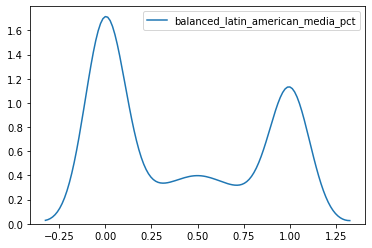

In [2]:
# distribution of media data
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
media_var = 'balanced_latin_american_media_pct'
sns.kdeplot(author_media_data.loc[:, media_var])
plt.show()

### Compare general word use
Let's look at the differences in word use between the `high` and `low` groups.

H1: `high` media authors are more culturally conservative and therefore use more formal language.

First, collect all prior posts from authors.

In [12]:
from data_helpers import load_data_from_dirs
import re
file_matcher = re.compile('.*tweets\.gz')
post_data_dir = '../../data/mined_tweets/loanword_author_tweets_all_archives/'
use_cols = ['screen_name', 'text', 'lang', 'lang_score']
author_post_data = load_data_from_dirs([post_data_dir], file_matcher=file_matcher, use_cols=use_cols)
author_post_data.fillna('', inplace=True)
print(author_post_data.shape[0])
## restrict to media authors
author_var = 'screen_name'
media_author_post_data = author_post_data[author_post_data.loc[:, author_var].isin(author_media_data.loc[:, author_var].unique())]
print(media_author_post_data.shape[0])

14519383
1451601


In [13]:
# filter out RT posts
RT_matcher = re.compile('^RT @\w+')
txt_var = 'text'
media_author_post_data = media_author_post_data.assign(**{
    'is_shared' : media_author_post_data.loc[:, txt_var].apply(lambda x: RT_matcher.search(x) is not None)
})
# filter out media posts
media_matcher = re.compile('(?<=youtube\.com/watch\?v=)[a-zA-Z0-9_\-]+|(?<=youtu\.be/)[a-zA-Z0-9_\-]+|(?<=spotify\.com/track/)[a-zA-Z0-9]+')
media_author_post_data = media_author_post_data.assign(**{
    'has_media' : media_author_post_data.loc[:, txt_var].apply(lambda x: media_matcher.search(x) is not None)
})

In [14]:
original_media_author_post_data = media_author_post_data[(~media_author_post_data.loc[:, 'is_shared']) & 
                                                         (~media_author_post_data.loc[:, 'has_media'])]
print('%d/%d original data'%(original_media_author_post_data.shape[0], media_author_post_data.shape[0]))

1350380/1451601 original data


In [15]:
# clean up @-mentions, #hashtags, URLs
from data_helpers import clean_tweet_txt
original_media_author_post_data = original_media_author_post_data.assign(**{
    'clean_text' : original_media_author_post_data.loc[:, txt_var].apply(clean_tweet_txt)
})
display(original_media_author_post_data.loc[:, 'clean_text'].iloc[:10])

27584      me parece tan tierno este hashtag 😍 #HASH @USER
27587    #HASH no les oda que cuanto más ganas tienen d...
27588                      estoy muy enamorada de él <URL>
27591    camila va a venir a españa y adivinen quien no...
27592          @USER ojalá despertarme con tu follow #HASH
27596    necesito abrazar a zabdiel el sábado y no lo v...
27614            @USER gracias por decirlo, tanta razón 👏🏻
27620                                  @USER @USER gracias
27622    @USER hablemos de lo meme que eres, me encanta...
27637    cnco y tini más os vale haberos sacado una fot...
Name: clean_text, dtype: object

In [16]:
# combine with media author data
author_var = 'screen_name'
original_media_author_post_data = pd.merge(original_media_author_post_data, author_media_data, on=author_var)
display(original_media_author_post_data.head())
print(original_media_author_post_data.shape[0])

,text,screen_name,lang,lang_score,file_dir,is_shared,has_media,clean_text,latin_american_media_pct,balanced_latin_american_media_pct,latin_american_media_pct_bin,balanced_latin_american_media_pct_bin
0,Me parece tan tierno este hashtag 😍 #WeLoveYou...,4everyoutini,es,98,loanword_author_tweets_all_archives,False,False,me parece tan tierno este hashtag 😍 #HASH @USER,0.75,1,media_high,media_high
1,#CNCOconTonyEnCCME no les Oda que cuanto más g...,4everyoutini,es,98,loanword_author_tweets_all_archives,False,False,#HASH no les oda que cuanto más ganas tienen d...,0.75,1,media_high,media_high
2,Estoy muy enamorada de él https://t.co/fBOLdqAcAt,4everyoutini,es,98,loanword_author_tweets_all_archives,False,False,estoy muy enamorada de él <URL>,0.75,1,media_high,media_high
3,Camila va a venir a España y adivinen quien no...,4everyoutini,es,99,loanword_author_tweets_all_archives,False,False,camila va a venir a españa y adivinen quien no...,0.75,1,media_high,media_high
4,@dinahjane97 ojalá despertarme con tu follow #...,4everyoutini,es,98,loanword_author_tweets_all_archives,False,False,@USER ojalá despertarme con tu follow #HASH,0.75,1,media_high,media_high


1350380


Let's compare the words used by the high-media authors and the low-media authors to determine if there's any formality effect immediately visible from the top-k words.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from data_helpers import BasicTokenizer
lang_long = 'spanish'
tokenizer = BasicTokenizer(lang=lang_long)
lang = 'es'
lang_stop_words = get_stop_words(lang)
cv = CountVectorizer(min_df=0.001, max_df=0.75, stop_words=lang_stop_words, tokenizer=tokenizer.tokenize)
dtm = cv.fit_transform(original_media_author_post_data.loc[:, 'clean_text'])
print(dtm.shape)

(1350380, 858)


In [ ]:
# get total counts for normalization
import numpy as np
def get_total_word_counts(dtm, idx_vocab_lookup):    
    total_word_counts = np.array(dtm.sum(axis=0))[0]
    total_word_counts = pd.Series(total_word_counts, index=[idx_vocab_lookup[i] for i in range(len(total_word_counts))])
    return total_word_counts

In [18]:
idx_vocab_lookup = {v : k for k,v in cv.vocabulary_.items()}
total_word_counts = get_total_word_counts(dtm, idx_vocab_lookup)
total_word_counts.sort_values(inplace=True, ascending=False)
print(total_word_counts.head(10))

>      680704
<      678581
,      474022
.      417284
url    385515
num    289020
!      248498
#      215156
…      214295
@      189077
dtype: int64


In [28]:
# same thing but for high-media and low-media authors
lang = 'es'
lang_score_cutoff = 95.
es_original_media_author_post_data = original_media_author_post_data[original_media_author_post_data.loc[:, 'lang_score']!='']
es_original_media_author_post_data = es_original_media_author_post_data[(es_original_media_author_post_data.loc[:, 'lang']==lang) &
                                                                        (es_original_media_author_post_data.loc[:, 'lang_score']>=lang_score_cutoff)]
# high media
high_media_idx = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_high'].index
low_media_idx = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_low'].index
high_media_dtm = dtm[high_media_idx, :]
low_media_dtm = dtm[low_media_idx, :]
high_media_word_counts = get_total_word_counts(high_media_dtm, idx_vocab_lookup)
low_media_word_counts = get_total_word_counts(low_media_dtm, idx_vocab_lookup)
# normalize counts
high_media_word_counts = high_media_word_counts / total_word_counts.loc[high_media_word_counts.index]
low_media_word_counts = low_media_word_counts / total_word_counts.loc[low_media_word_counts.index]
# compute ratio
high_low_media_word_ratio = high_media_word_counts / low_media_word_counts
low_high_media_word_ratio = low_media_word_counts / high_media_word_counts
# remove bad values
high_low_media_word_ratio.dropna(inplace=True)
low_high_media_word_ratio.dropna(inplace=True)
high_low_media_word_ratio = high_low_media_word_ratio[~np.isinf(high_low_media_word_ratio)]
low_high_media_word_ratio = low_high_media_word_ratio[~np.isinf(low_high_media_word_ratio)]
high_low_media_word_ratio.sort_values(inplace=True, ascending=False)
low_high_media_word_ratio.sort_values(inplace=True, ascending=False)

In [36]:
# show example posts from high-media, low-media authors for sanity check
print('high-media author text')
display(es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_high'].drop_duplicates('screen_name').loc[:, 'clean_text'].head(20).values)
print('low-media author text')
display(es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_low'].drop_duplicates('screen_name').loc[:, 'clean_text'].head(20).values)

high-media author text


array(['me parece tan tierno este hashtag 😍 #HASH @USER',
       'tyra y gisele también 💅🏼',
       'para ser menor que yo, tienes muchas arrugas....👀',
       'lo que vivimos fue tan sincero... cuando te quise, cuanto te quiero.',
       'me pasan cosas con esta canción. 💘',
       'si la amas, si realmente la amas no te des por vencido lucha por su amor hasta el final.',
       'no sé explicar que me gusta de ti, loca — mi olor. debe ser. <URL>',
       'escapateconmigoestanochebebé 🎤',
       'oye @USER: llévate a @USER para tu <NUM>ra temporada, así el banquillo de @USER quedará libre para alguien capaz. @USER',
       'diache que sueño tengoooo',
       'no valoraste mis  "avisame cuando llegues a tu casa"',
       'muy feo un lunes a las <NUM> am estará escuchando rancheras 🤔',
       '@USER bueno, espero animarme e ir !',
       'hace cuanto que conociste a tu novia? — en enero <URL>',
       'aún no me hago la idea de no trabajar más😢.. cómo voy a extrañar mi trabajo y a mis am

low-media author text


array(['@USER jajajajajaj pero es el primero que rompo en <NUM> meses vos rompiste <NUM> en <NUM> mes hasdasd',
       'no se puede así 🙄😂🤦\u200d♂️',
       '@USER @USER ojalá si surtan efecto, quiero boda.',
       '@USER dime "gracias" cabrón',
       'el de la cena jajjaajajajajajjaaj ya somos amigos b... — pero déjate vel.  <URL>',
       'no puedo estar bien con esta mina nunca',
       'mi cabeza es un mar de flashes, la cagada es que nadie se anima a meterse...',
       'la leche ya caduco y ahora si tengo galletas, aqui es cuando te das cuenta que la suerte no esta de tu lado',
       '@USER @USER necesito a mi marido guey d: #HASH',
       '@USER yo hace mucho que dejé pero eso se veía venir y por lo que me han dicho toda la temporada tiraron pedradas… <URL>',
       '@USER #HASH con un poco de suerte sere podré ganar <NUM> iphone 😎',
       'ayer no tenía internet y bueno, que arrechera.',
       '@USER sabes que no es cierto',
       'yo: tengo que ahorrar also yo: en cuanto

Just glancing at the data it looks like the high-media authors use more emojis and more complete sentences?

In [30]:
# words associated with high media authors
display(print(high_low_media_word_ratio.head(50)))
# words associated with low media authors
display(print(low_high_media_word_ratio.head(50)))

luna         6.142857
by           6.000000
rt           6.000000
at           6.000000
have         4.000000
luis         3.300000
pedir        2.916667
gol          2.888889
méxico       2.750000
whatsapp     2.727273
venezuela    2.571429
bonita       2.363636
r            2.285714
neta         2.222222
ex           2.210526
colombia     2.133333
show         2.076923
please       2.000000
now          2.000000
or           2.000000
fuck         2.000000
vía          1.969231
conocer      1.937500
respuesta    1.928571
so           1.909091
centro       1.900000
manos        1.894737
celular      1.882353
juntos       1.863636
jajajaj      1.833333
buenos       1.833333
última       1.809524
don          1.800000
llegó        1.777778
dejen        1.777778
miedo        1.773585
chicas       1.764706
respeto      1.750000
opinión      1.750000
aqui         1.684211
dias         1.684211
sol          1.681818
disco        1.681818
for          1.666667
gusto        1.666667
bro       

None

bts          20.000000
but           7.000000
up            4.500000
as            4.000000
what          3.333333
on            3.000000
's            3.000000
get           3.000000
bastante      2.608696
that          2.500000
we            2.400000
come          2.400000
cabron        2.384615
perfecto      2.384615
is            2.333333
new           2.333333
che           2.250000
lol           2.062500
..            2.037037
want          2.000000
out           2.000000
just          2.000000
bad           2.000000
all           2.000000
eu            2.000000
an            2.000000
&             1.921569
carrera       1.916667
of            1.888889
pelo          1.882353
caso          1.850000
punto         1.848485
h             1.809524
¿y            1.800000
day           1.800000
social        1.800000
películas     1.785714
wow           1.777778
|             1.760000
not           1.750000
arte          1.714286
política      1.666667
you           1.666667
tweet      

None

High media authors use more:
- link sharing (?) (`by` `at` `rt`)
- code-switching (`please` `show` `now` `fuck` `for`)
- Latin American country names (`méxico` `venezuela` `colombia`)
- social words (`conocer` `respuesta` `respeto` `opinión`)
- technology (`whatsapp` `celular`)

Low media authors use more:
- code-switching (`but` `up` `as` `get` `we` `come`)
- vulgarity (`cabron`)
- emotions (`lol` `wow` `xd`)

### Word counts: wider coverage
Let's re-do the word count comparison but with more words (lower min frequency threshold).

In [34]:
# compute DTM
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from data_helpers import BasicTokenizer
lang_long = 'spanish'
tokenizer = BasicTokenizer(lang=lang_long)
lang = 'es'
lang_stop_words = get_stop_words(lang)
min_df = 0.0001
cv = CountVectorizer(min_df=min_df, max_df=0.75, stop_words=lang_stop_words, tokenizer=tokenizer.tokenize)
dtm = cv.fit_transform(original_media_author_post_data.loc[:, 'clean_text'])
print(dtm.shape)
idx_vocab_lookup = {v : k for k,v in cv.vocabulary_.items()}
total_word_counts = get_total_word_counts(dtm, idx_vocab_lookup)
total_word_counts.sort_values(inplace=True, ascending=False)
print(total_word_counts.head(10))
# compute DTM for high-media, low-media authors
lang = 'es'
lang_score_cutoff = 95.
es_original_media_author_post_data = original_media_author_post_data[original_media_author_post_data.loc[:, 'lang_score']!='']
es_original_media_author_post_data = es_original_media_author_post_data[(es_original_media_author_post_data.loc[:, 'lang']==lang) &
                                                                        (es_original_media_author_post_data.loc[:, 'lang_score']>=lang_score_cutoff)]
# high media
high_media_idx = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_high'].index
low_media_idx = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin'] == 'media_low'].index
high_media_dtm = dtm[high_media_idx, :]
low_media_dtm = dtm[low_media_idx, :]
high_media_word_counts = get_total_word_counts(high_media_dtm, idx_vocab_lookup)
low_media_word_counts = get_total_word_counts(low_media_dtm, idx_vocab_lookup)
# normalize counts
high_media_word_counts = high_media_word_counts / total_word_counts.loc[high_media_word_counts.index]
low_media_word_counts = low_media_word_counts / total_word_counts.loc[low_media_word_counts.index]
# compute ratio
high_low_media_word_ratio = high_media_word_counts / low_media_word_counts
low_high_media_word_ratio = low_media_word_counts / high_media_word_counts
# remove bad values
high_low_media_word_ratio.dropna(inplace=True)
low_high_media_word_ratio.dropna(inplace=True)
high_low_media_word_ratio = high_low_media_word_ratio[~np.isinf(high_low_media_word_ratio)]
low_high_media_word_ratio = low_high_media_word_ratio[~np.isinf(low_high_media_word_ratio)]
high_low_media_word_ratio.sort_values(inplace=True, ascending=False)
low_high_media_word_ratio.sort_values(inplace=True, ascending=False)

(1350380, 7481)
>      680704
<      678581
,      474022
.      417284
url    385515
num    289020
!      248498
#      215156
…      214295
@      189077
dtype: int64


In [35]:
top_k = 50
print('high media author word counts')
display(high_low_media_word_ratio.head(top_k))
print('low media author word counts')
display(low_high_media_word_ratio.head(top_k))

high media author word counts


karol          72.000000
zayn           21.000000
micaela        18.000000
dará           12.000000
bardo          11.000000
mexicanos      10.000000
entere         10.000000
jorge           9.500000
venia           9.000000
chat            9.000000
firma           9.000000
ejército        9.000000
falsa           8.000000
*               8.000000
lleguen         8.000000
doña            8.000000
gabriel         8.000000
pelotudos       8.000000
emocional       8.000000
compañía        8.000000
tomó            8.000000
plataforma      8.000000
cuántas         8.000000
duró            8.000000
mueren          8.000000
familias        7.000000
recordando      7.000000
jajajajjaja     7.000000
álvaro          7.000000
silla           7.000000
reir            7.000000
jóvenes         7.000000
pierna          7.000000
junior          7.000000
negocios        7.000000
nacho           7.000000
sentado         7.000000
ahorita         6.750000
nacimiento      6.500000
marta           6.166667


low media author word counts


jimin         23.00
bts           20.00
hoseok        13.00
sabrina       12.00
rol           11.00
cierra        10.00
suelo          9.50
¡              9.25
ariana         9.00
xdddd          9.00
marina         9.00
pelis          9.00
wea            9.00
army           9.00
bondi          9.00
pucha          9.00
haha           8.00
coñazo         8.00
merecido       8.00
pio            8.00
quiénes        8.00
rompió         8.00
lym            8.00
casita         8.00
botón          8.00
disculpas      8.00
fino           8.00
weon           7.00
but            7.00
moon           7.00
ep             7.00
mean           7.00
agarrar        7.00
ea             7.00
objetivo       7.00
reglas         7.00
ever           7.00
increíbles     7.00
halsey         7.00
empresas       7.00
chiquita       7.00
aseguro        7.00
dejame         7.00
culiao         7.00
sofía          6.50
gringos        6.00
bieber         6.00
peronismo      6.00
nací           6.00
trama          6.00


High-media authors tend to mention:
- celebrities (`karol` `zayn` ``michaela` `gabriel`)
- social words (?) (`familias` `emocional` `compañía` `patria`)

Low-media authors tend to mention:
- American, other celebrities (`jimin` `bts` `hoseok` `sabrina` `ariana`)
- English (`haha` `but` `ever` `moon`)
- political (?) (`gringos` `peronismo`)

### Language formality

This is not super informative on its own! Let's try out some semi-reasonable proxies for formality:

- word length
- type/token ratio
- sentence complexity

We will compute this metric per-author and then compare the distributions, to avoid upweighting the overly active authors.

In [37]:
# restrict to actual Spanish data
lang = 'es'
lang_score_cutoff = 95.
es_original_media_author_post_data = original_media_author_post_data[original_media_author_post_data.loc[:, 'lang_score']!='']
es_original_media_author_post_data = es_original_media_author_post_data[(es_original_media_author_post_data.loc[:, 'lang']==lang) &
                                                                        (es_original_media_author_post_data.loc[:, 'lang_score']>=lang_score_cutoff)]

In [38]:
# restrict to actual words! no USER/HASHTAG/URL crap
from data_helpers import BasicTokenizer
filter_words = set(['@USER', '#HASH', '<NUM>', '<URL>'])
lang_long = 'spanish'
tokenizer = BasicTokenizer(lang=lang_long)
es_original_media_author_post_data = es_original_media_author_post_data.assign(**{
    'text_tokens' : es_original_media_author_post_data.loc[:, 'clean_text'].apply(lambda x: list(filter(lambda x: x not in filter_words, tokenizer.tokenize(x))))
})

In [39]:
# compute text metrics
def compute_word_length(text_tokens):
    token_len = list(map(len, text_tokens))
    mean_token_len = np.mean(token_len)
    return mean_token_len
def compute_type_token_ratio(text_tokens):
    type_token_ratio = len(text_tokens) / len(set(text_tokens))
    return type_token_ratio
def compute_sentence_complexity(text_tokens):
    # TODO Spanish syntax parser??
    # need to sample data to keep runtime reasonable
    # POS entropy?
    pass

In [122]:
from functools import reduce
author_var = 'screen_name'
author_tokens = es_original_media_author_post_data.groupby(author_var).apply(lambda x: list(reduce(lambda x,y: x+y, x.loc[:, 'text_tokens'].values)))
author_word_len = author_tokens.apply(lambda x: compute_word_length(x)).reset_index().rename(columns={0:'word_len'})
author_type_token_ratio = author_tokens.apply(lambda x: compute_type_token_ratio(x)).reset_index().rename(columns={0:'type_token_ratio'})
author_style_data = pd.merge(author_word_len, author_type_token_ratio, on=author_var)
display(author_style_data.head())

,screen_name,word_len,type_token_ratio
0,0osman,3.462687,1.313725
1,1iramosfdz,3.643445,2.797023
2,1justjenny1,3.982353,1.619048
3,1salas_molina,3.809717,1.563291
4,1v4nuzz,3.582524,1.961905


In [66]:
# get POS tags
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import tag_sents
lang = 'spanish'
media_author_sents = es_original_media_author_post_data.loc[:, 'clean_text'].values
tag_type = 'parallel'
# takes ~5 mins for 50K sentences
media_author_tagged_sents = tag_sents(media_author_sents, lang=lang, port=9003, tag_type=tag_type)

In [89]:
# compute POS tag distribution per-author
from functools import reduce
import pandas as pd
def compute_tag_distribution(tagged_sents):
    words, tags = list(zip(*(map(lambda x: list(zip(*x)), tagged_sents))))
    combined_tags = list(reduce(lambda x,y: x+y, tags))
    tag_counts = pd.Series(combined_tags).value_counts()
    tag_dist = tag_counts / tag_counts.sum()
    return tag_dist

In [123]:
es_original_media_author_post_data = es_original_media_author_post_data.assign(**{
    'sent_tags' : media_author_tagged_sents
})
author_var = 'screen_name'
author_tag_distributions = es_original_media_author_post_data.groupby(author_var).apply(lambda x: compute_tag_distribution(x.loc[:, 'sent_tags'].values))
author_tag_distributions = author_tag_distributions.reset_index(level=1, name='tag_pct').rename(columns={'level_1':'tag'}).reset_index()
tag_vars = ['tag', 'tag_pct']
author_tag_distributions_flat = []
for author_i, data_i in author_tag_distributions.groupby(author_var):
    flat_data_i = data_i.loc[:, 'tag_pct']
    flat_data_i.index = data_i.loc[:, 'tag']
    flat_data_i.loc[author_var] = author_i
    author_tag_distributions_flat.append(flat_data_i)
author_tag_distributions = pd.concat(author_tag_distributions_flat, axis=1).transpose().reset_index(drop=True)
author_tag_distributions.fillna(0., inplace=True)
display(author_tag_distributions.head())
# join with style data
combined_author_style_data = pd.merge(author_style_data, author_tag_distributions, on='screen_name')

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,NOUN,PUNCT,DET,ADP,ADV,VERB,X,CONJ,INTJ,AUX,PRON,ADJ,PROPN,SCONJ,screen_name,NUM,SYM,PART,_
0,0.231884,0.130435,0.115942,0.101449,0.086957,0.086957,0.072464,0.043478,0.028986,0.028986,0.028986,0.014493,0.014493,0.014493,0osman,0.000000,0.000000,0.0,0.0
1,0.159239,0.090994,0.076137,0.089601,0.056175,0.132312,0.062674,0.034819,0.001857,0.039926,0.106314,0.032033,0.056175,0.053853,1iramosfdz,0.004643,0.003250,0.0,0.0
2,0.182927,0.121951,0.079268,0.067073,0.048780,0.134146,0.018293,0.024390,0.006098,0.018293,0.073171,0.030488,0.146341,0.036585,1justjenny1,0.012195,0.000000,0.0,0.0
3,0.149378,0.058091,0.091286,0.078838,0.116183,0.186722,0.037344,0.029046,0.004149,0.037344,0.095436,0.045643,0.037344,0.016598,1salas_molina,0.012448,0.004149,0.0,0.0
4,0.162679,0.186603,0.090909,0.086124,0.019139,0.081340,0.095694,0.033493,0.000000,0.019139,0.043062,0.028708,0.095694,0.019139,1v4nuzz,0.004785,0.033493,0.0,0.0


In [125]:
high_media_authors = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin']=='media_high'].loc[:, author_var].unique()
low_media_authors = es_original_media_author_post_data[es_original_media_author_post_data.loc[:, 'balanced_latin_american_media_pct_bin']=='media_low'].loc[:, author_var].unique()
print('%d high-media authors'%(len(high_media_authors)))
print('%d low-media authors'%(len(low_media_authors)))
# combine author type with other data
author_type_df = pd.DataFrame([list(high_media_authors) + list(low_media_authors), 
                               ['media_high',]*len(high_media_authors) + ['media_low',]*len(low_media_authors)],
                             index=['screen_name', 'media_type']).transpose()
media_author_style_data = pd.merge(combined_author_style_data, author_type_df, on=author_var)
display(media_author_style_data.head())

605 high-media authors
602 low-media authors


,screen_name,word_len,type_token_ratio,NOUN,PUNCT,DET,ADP,ADV,VERB,X,...,AUX,PRON,ADJ,PROPN,SCONJ,NUM,SYM,PART,_,media_type
0,0osman,3.462687,1.313725,0.231884,0.130435,0.115942,0.101449,0.086957,0.086957,0.072464,...,0.028986,0.028986,0.014493,0.014493,0.014493,0.000000,0.000000,0.0,0.0,media_low
1,1iramosfdz,3.643445,2.797023,0.159239,0.090994,0.076137,0.089601,0.056175,0.132312,0.062674,...,0.039926,0.106314,0.032033,0.056175,0.053853,0.004643,0.003250,0.0,0.0,media_low
2,1salas_molina,3.809717,1.563291,0.149378,0.058091,0.091286,0.078838,0.116183,0.186722,0.037344,...,0.037344,0.095436,0.045643,0.037344,0.016598,0.012448,0.004149,0.0,0.0,media_low
3,1v4nuzz,3.582524,1.961905,0.162679,0.186603,0.090909,0.086124,0.019139,0.081340,0.095694,...,0.019139,0.043062,0.028708,0.095694,0.019139,0.004785,0.033493,0.0,0.0,media_high
4,28__06__42__12,3.574830,1.826087,0.173913,0.107023,0.090301,0.070234,0.033445,0.133779,0.107023,...,0.053512,0.080268,0.043478,0.063545,0.006689,0.003344,0.003344,0.0,0.0,media_high


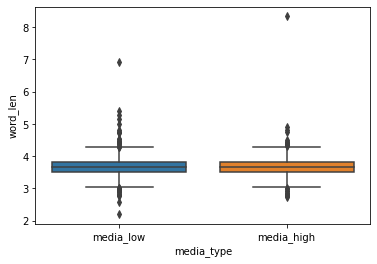

difference: test stat = -0.318 (p=7.507E-01)


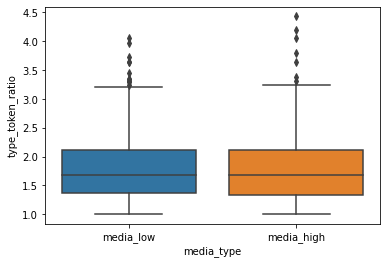

difference: test stat = -0.110 (p=9.128E-01)


In [59]:
from scipy.stats import mannwhitneyu, ttest_ind
import seaborn as sns
style_vars = ['word_len', 'type_token_ratio']
author_type_var = 'media_type'
for style_var in style_vars:
    # plot difference
    sns.boxplot(x=author_type_var, y=style_var, data=media_author_style_data)
    plt.show()
    # compute differences
    low_media_stat = media_author_style_data[media_author_style_data.loc[:, 'media_type']=='media_low'].loc[:, style_var]
    high_media_stat = media_author_style_data[media_author_style_data.loc[:, 'media_type']=='media_high'].loc[:, style_var]
#     test_stat, p_val = mannwhitneyu(low_media_stat, high_media_stat)
    test_stat, p_val = ttest_ind(low_media_stat, high_media_stat) # mean of means > median of means
    print('difference: test stat = %.3f (p=%.3E)'%(test_stat, p_val))

The high-media authors have slightly more variance but roughly the same mean as the low-media authors.

Let's compare the tag distributions.

In [139]:
tag_vars = list(set(media_author_style_data.columns) - set(['screen_name', 'word_len', 'type_token_ratio', 'media_type']))
author_tag_pct_data = pd.melt(media_author_style_data, id_vars=['screen_name', 'media_type'], value_vars=tag_vars, var_name='tag', value_name='tag_pct')
print(author_tag_pct_data.shape[0])
print(author_tag_pct_data.head())

21726
      screen_name  media_type tag  tag_pct
0          0osman   media_low   _      0.0
1      1iramosfdz   media_low   _      0.0
2   1salas_molina   media_low   _      0.0
3         1v4nuzz  media_high   _      0.0
4  28__06__42__12  media_high   _      0.0


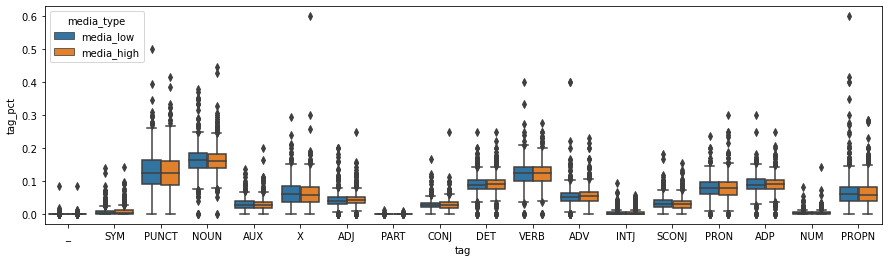

In [145]:
import seaborn as sns
plt.figure(figsize=(15, 4))
sns.boxplot(x='tag', y='tag_pct', hue='media_type', data=author_tag_pct_data)
plt.show()

Are the differences significant? Let's try an ANOVA test.

In [143]:
from scipy.stats import f_oneway
media_tag_pct_mean = author_tag_pct_data.groupby('media_type').apply(lambda x: x.groupby('tag').apply(lambda y: y.loc[:, 'tag_pct'].mean()))
print(media_tag_pct_mean)
test_stat, p_val = f_oneway(media_tag_pct_mean.loc['media_high'], media_tag_pct_mean.loc['media_low'])
print('significant population difference with test stat %.3f (p=%.3E)'%(test_stat, p_val))

tag              ADJ       ADP       ADV       AUX      CONJ       DET  \
media_type                                                               
media_high  0.043049  0.089200  0.054517  0.028340  0.027588  0.090774   
media_low   0.042724  0.088746  0.054433  0.029373  0.027420  0.089151   

tag             INTJ      NOUN       NUM      PART      PRON     PROPN  \
media_type                                                               
media_high  0.004038  0.164258  0.003773  0.000090  0.079675  0.063784   
media_low   0.004137  0.163917  0.003578  0.000077  0.077305  0.067017   

tag            PUNCT     SCONJ       SYM      VERB         X         _  
media_type                                                              
media_high  0.125952  0.031018  0.008725  0.122821  0.061994  0.000402  
media_low   0.128111  0.032138  0.007573  0.121806  0.062075  0.000419  
significant population difference with test stat 0.000 (p=1.000E+00)


No population-level difference, but maybe there's a pairwise difference when we consider the full author population.

In [147]:
from scipy.stats import mannwhitneyu, ttest_ind
for tag_i, data_i in author_tag_pct_data.groupby('tag'):
    high_media_data_i = data_i[data_i.loc[:, 'media_type']=='media_high'].loc[:, 'tag_pct']
    low_media_data_i = data_i[data_i.loc[:, 'media_type']=='media_low'].loc[:, 'tag_pct']
    mean_diff = high_media_data_i.mean() - low_media_data_i.mean()
    test_stat, p_val = mannwhitneyu(high_media_data_i, low_media_data_i)
    print('tag=%s, mean diff %.3f, test stat = %.3f (p=%.3E)'%(tag_i, mean_diff, test_stat, p_val))

tag=ADJ, mean diff 0.000, test stat = 174526.500 (p=1.054E-01)
tag=ADP, mean diff 0.000, test stat = 179408.000 (p=3.280E-01)
tag=ADV, mean diff 0.000, test stat = 178741.000 (p=2.893E-01)
tag=AUX, mean diff -0.001, test stat = 172848.500 (p=6.306E-02)
tag=CONJ, mean diff 0.000, test stat = 180725.500 (p=4.099E-01)
tag=DET, mean diff 0.002, test stat = 177640.000 (p=2.305E-01)
tag=INTJ, mean diff -0.000, test stat = 179249.000 (p=3.043E-01)
tag=NOUN, mean diff 0.000, test stat = 178986.000 (p=3.033E-01)
tag=NUM, mean diff 0.000, test stat = 176776.000 (p=1.771E-01)
tag=PART, mean diff 0.000, test stat = 181808.000 (p=4.487E-01)
tag=PRON, mean diff 0.002, test stat = 179869.000 (p=3.560E-01)
tag=PROPN, mean diff -0.003, test stat = 178311.500 (p=2.655E-01)
tag=PUNCT, mean diff -0.002, test stat = 177626.000 (p=2.298E-01)
tag=SCONJ, mean diff -0.001, test stat = 174961.500 (p=1.189E-01)
tag=SYM, mean diff 0.001, test stat = 178533.500 (p=2.723E-01)
tag=VERB, mean diff 0.001, test stat = 

OK! We see some slight tendencies but not significant differences.

### Compare URL sharing habits
It could be the case that Latin American music is a proxy for other cultural values like conservative stance.

Let's test that by comparing the URLs shared by high-media authors with those from low-media authors.

In [1]:
# collect all author data INCLUDING URLs
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import load_data_from_dirs
import re
data_dir = '../../data/mined_tweets/loanword_author_tweets_all_archives/'
use_cols = ['screen_name', 'text', 'urls', 'lang', 'lang_score']
author_data = load_data_from_dirs([data_dir], use_cols=use_cols)
# limit to actual text data
author_data.fillna('', inplace=True)
author_data = author_data[author_data.loc[:, 'text']!='']

In [2]:
# what URLs do we already have
print('%d/%d posts with valid URLs'%(author_data[author_data.loc[:, 'urls']!=''].shape[0], author_data.shape[0]))

2063046/14411532 posts with valid URLs


In [3]:
# extract URLs for all posts as a backup
from urlextract import URLExtract
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=10)
extractor = URLExtract()
# add space before URL
author_data = author_data.assign(**{
    'clean_text' : author_data.loc[:, 'text'].apply(lambda x: x.replace('https://', ' https://'))
})
author_data = author_data.assign(**{
    'txt_urls' : author_data.parallel_apply(lambda x: extractor.find_urls(x.loc['clean_text']) if x.loc['urls']!='' else x.loc['urls'], axis=1)
})

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
# let's stem the URL 
# https://twitter.com/blahblah => twitter.com
from functools import reduce
import re
url_base_matcher = re.compile('(?<=^https://)[a-zA-Z0-9\-]+\.[a-zA-Z0-9\-]+(?=/)|(?<=^)[a-zA-Z0-9\-]+\.[a-zA-Z0-9\-]+(?=/)')
print(url_base_matcher.findall('https://twitter.com/hnellibertador'))

author_data = author_data.assign(**{
    'clean_urls' : author_data.loc[:, 'txt_urls'].parallel_apply(lambda x: list(map(lambda y: url_base_matcher.findall(y), x)))
})
# recombine etc
author_data = author_data.assign(**{
    'clean_urls' : author_data.loc[:, 'clean_urls'].apply(lambda x: list(reduce(lambda a,b: a+b, x)) if len(x) > 0 else x)
})
display(author_data[author_data.loc[:, 'clean_urls'].apply(lambda x: len(x) > 0)].loc[:, 'clean_urls'].iloc[:10])

['twitter.com']


105    [twitter.com]
107    [twitter.com]
110    [twitter.com]
115    [twitter.com]
117    [twitter.com]
118    [twitter.com]
119    [twitter.com]
120    [twitter.com]
122    [twitter.com]
124    [twitter.com]
Name: clean_urls, dtype: object

In [5]:
# get URL counts
import pandas as pd
urls_combined = []
for urls in author_data.loc[:, 'clean_urls'].values:
    urls_combined += urls
url_counts = pd.Series(urls_combined).value_counts()
print(url_counts.head(20))

twitter.com      1033091
youtu.be           51318
bit.ly             27197
curiouscat.me      26365
buff.ly            15252
instagram.com      13767
goo.gl             13101
fb.me              12345
facebook.com       10590
ift.tt              9800
elpais.com          7681
ow.ly               5614
wp.me               5349
dlvr.it             3747
tmblr.co            3465
lnkd.in             3158
youtube.com         2612
sumall.com          2565
is.gd               2249
donlengua.com       1971
dtype: int64


Now! What kinds of URLs tend to get shared by high-Latin American media authors vs. low-Latin American media authors?

In [6]:
author_social_data = pd.read_csv('../../data/mined_tweets/loanword_authors_combined_full_social_data.tsv', sep='\t')
combined_author_data = pd.merge(author_data, author_social_data.loc[:, ['screen_name', 'balanced_latin_american_media_pct_bin', 'es_bin']])
combined_author_data.fillna('', inplace=True)
# restrict to valid authors
combined_author_data = combined_author_data[combined_author_data.loc[:, 'balanced_latin_american_media_pct_bin']!='']
# we can't restrict to high Spanish population because of weird sparsity
# combined_author_data = combined_author_data[combined_author_data.loc[:, 'es_bin']=='es_high']
display(combined_author_data.head())

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,21,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,text,screen_name,lang,lang_score,urls,file_dir,clean_text,txt_urls,clean_urls,balanced_latin_american_media_pct_bin,es_bin
22365,RT @CCabelloduh: Se imaginan odiar a Camila y ...,4everyoutini,es,99,,loanword_author_tweets_all_archives,RT @CCabelloduh: Se imaginan odiar a Camila y ...,,[],media_high,es_mid
22366,RT @_ruggero: Nuevo día de rodaje!!! 🎥 estoy m...,4everyoutini,es,99,,loanword_author_tweets_all_archives,RT @_ruggero: Nuevo día de rodaje!!! 🎥 estoy m...,,[],media_high,es_mid
22367,RT @cmonspaingirl: no puedo odiar más esto:htt...,4everyoutini,es,98,,loanword_author_tweets_all_archives,RT @cmonspaingirl: no puedo odiar más esto: ht...,,[],media_high,es_mid
22368,RT @ajplusespanol: Pink sí sabe cómo subir el ...,4everyoutini,es,98,,loanword_author_tweets_all_archives,RT @ajplusespanol: Pink sí sabe cómo subir el ...,,[],media_high,es_mid
22369,RT @TiniStoessel: Que emocionante y lindo recu...,4everyoutini,es,99,,loanword_author_tweets_all_archives,RT @TiniStoessel: Que emocionante y lindo recu...,,[],media_high,es_mid


In [7]:
# compute URL percents
high_media_author_data = combined_author_data[combined_author_data.loc[:, 'balanced_latin_american_media_pct_bin']=='media_high']
low_media_author_data = combined_author_data[combined_author_data.loc[:, 'balanced_latin_american_media_pct_bin']=='media_low']
# collect counts
high_media_author_url_counts = []
for urls_i in high_media_author_data.loc[:, 'clean_urls'].values:
    high_media_author_url_counts += urls_i
high_media_author_url_counts = pd.Series(high_media_author_url_counts).value_counts()
low_media_author_url_counts = []
for urls_i in low_media_author_data.loc[:, 'clean_urls'].values:
    low_media_author_url_counts += urls_i
low_media_author_url_counts = pd.Series(low_media_author_url_counts).value_counts()
# normalize
high_media_author_url_pct = high_media_author_url_counts / high_media_author_url_counts.sum()
low_media_author_url_pct = low_media_author_url_counts / low_media_author_url_counts.sum()

In [8]:
# compute ratio
import numpy as np
high_low_media_author_url_ratio = high_media_author_url_pct / low_media_author_url_pct
# remove bad data
high_low_media_author_url_ratio.dropna(inplace=True)
high_low_media_author_url_ratio = high_low_media_author_url_ratio[~np.isinf(high_low_media_author_url_ratio)]
# high media authors
print('high media authors')
high_low_media_author_url_ratio.sort_values(inplace=True, ascending=False)
display(high_low_media_author_url_ratio.head(50))
# low media authors
print('low media authors')
high_low_media_author_url_ratio = 1/high_low_media_author_url_ratio
high_low_media_author_url_ratio.sort_values(inplace=True, ascending=False)
display(high_low_media_author_url_ratio.head(50))

high media authors


swarmapp.com            34.197430
dribbble.com            14.398918
lnkd.in                 14.240688
los40.com               13.370424
latercera.com           10.027818
elcomercio.pe           10.027818
peru21.pe                6.685212
nytimes.com              6.685212
artstn.co                6.170965
umusic.digital           6.170965
ask.fm                   5.142471
refor.ma                 4.885347
ncrnoticias.com          4.628224
interferencia.cl         4.628224
f3.cool                  4.285392
fb.me                    4.115800
cuartopoder.es           4.113977
audiomack.com            4.113977
eldesconcierto.cl        4.113977
regeneracion.mx          4.113977
spoti.fi                 3.771145
idrlabs.com              3.599729
pitchfork.com            3.599729
diariocorreo.pe          3.085482
ow.ly                    3.085482
cornershopapp.com        3.085482
slate.com                3.085482
reddit.com               3.085482
theclinic.cl             3.085482
giphy.com     

low media authors


buff.ly                    189.597580
audioboom.com               29.168858
vine.co                     27.872465
elrockescultura.com         26.251973
curiouscat.qa               22.362791
marketing4ecommerce.net     21.876644
infosalus.com               19.445906
wwwhatsnew.com              16.529020
puromarketing.com           16.529020
as.com                      15.556724
paper.li                    12.639839
tvtime.com                  12.639839
mixcloud.com                 9.236805
mega.nz                      8.750658
20minutos.es                 8.750658
amzn.to                      8.750658
elperiodico.com              7.454264
local.mx                     6.806067
huffingtonpost.es            6.806067
t13.cl                       6.806067
forms.gle                    5.833772
github.com                   5.139275
pijamasurf.com               4.861476
mailchi.mp                   4.861476
vilmanunez.com               4.861476
shar.es                      4.645411
chn.ge      

High media authors tend to share links from:
- social media platforms (`swarmapp.com` `dribbble.com` `fb.me` `lnkd.in` `ask.fm` `f3.cool` `reddit.com` `ow.ly` `bnc.lt` `ko-fi.com` `patreon.com`)
- art/music sharing (`artstn.co` `umusic.digital` `audiomack.com` `radiocut.fm` `mycreativetype.com` `spoti.fi` `giphy.com`)
- Latin American, Spanish news (`elcomercio.pe` `latercera.com` `peru21.pe` `refor.ma` `interferencia.cl` `regeneracion.mx` `cuartopoder.es` `ncrnoticias.com` `diariocorreo.pe` `ciperchile.cl` `nuevatribuna.es` `infolibre.es` `eldinamo.cl` `globovision.com` `diariosur.es` `pousta.com` `laverdadnoticias.com` `xataka.com` `los40.com` `eldesconcierto.cl`)
    - news sites may be more political? either right-wing or left-wing
    - specialty news sites, e.g. entertainment, sports, tech
- other news (`nytimes.com` `slate.com` `pressenza.com` `pitchfork.com`)
- health news (`theclinic.cl` `psicologiaymente.com`)
- data storage (`db.tt`)
- other (`is.gd` `issuu.com` `univision.com` `idrlabs.com` `cornershopapp.com`)

Low media authors tend to share links from:
- marketing (`marketing4ecommerce.net` `puromarketing.com` `sumall.com`)
- art/music sharing (`buff.ly` `audioboom.com` `vine.co` `elrockescultura.com` `mixcloud.com` `tvtime.com` `streamable.com` `archiveofourown.org` `vsco.co`)
- social media platforms (`curiouscat.qa` `paper.li` `mailchi.mp` `chn.ge` `disq.us`)
- Latin American, Spanish news (`as.com` `elperiodico.com` `20minutos.es` `t13.cl` `wwwhatsnew.com` `pijamasurf.com` `eldeforma.com` `lavozdegalicia.es` `valenciaplaza.com` `elconfidencial.com` `europapress.es` `elcooperante.com` `shangay.com` `eljueves.es` `xlsemanal.com` `topeteglz.org` `rtve.es` `elmundo.es` `canaln.pe` `local.mx` `digitalsevilla.com`)
    - specialty news sites, e.g. entertainment
    - more mainland Spain?
    - blogs? 
- health news (`infosalus.com`)
- other news (`huffingtonpost.es` `hola.com` `nbcnews.com` `cnn.it`)
- shopping (`amzn.to`)
- data storage (`mega.nz` `github.com` `shar.es`) 
- other (`vilmanunez.com` `trib.al` `forms.gle`)

- High-media authors tend to use more social media (and more mainstream social media) than low-media authors.
- High-media authors tend to share more Latin American media than low-media authors (mainland Spain focus).

Let's plot these distributions.

In [9]:
# store as structured data
high_low_author_media_URL_types = [
    ['high_media','swarmapp.com','social_media'],
    ['high_media','dribbble.com','social_media'],
    ['high_media','fb.me','social_media'],
    ['high_media','lnkd.in','social_media'],
    ['high_media','ask.fm','social_media'],
    ['high_media','f3.cool','social_media'],
    ['high_media','reddit.com','social_media'],
    ['high_media','ow.ly','social_media'],
    ['high_media','bnc.lt','social_media'],
    ['high_media','ko-fi.com','social_media'],
    ['high_media','patreon.com','social_media'],
    ['high_media','artstn.co','art_music'],
    ['high_media','umusic.digital','art_music'],
    ['high_media','audiomack.com','art_music'],
    ['high_media','radiocut.fm','art_music'],
    ['high_media','mycreativetype.com','art_music'],
    ['high_media','spoti.fi','art_music'],
    ['high_media','giphy.com','art_music'],
    ['high_media','elcomercio.pe','es_news'],
    ['high_media','latercera.com','es_news'],
    ['high_media','peru21.pe','es_news'],
    ['high_media','refor.ma','es_news'],
    ['high_media','interferencia.cl','es_news'],
    ['high_media','regeneracion.mx','es_news'],
    ['high_media','cuartopoder.es','es_news'],
    ['high_media','ncrnoticias.com','es_news'],
    ['high_media','diariocorreo.pe','es_news'],
    ['high_media','ciperchile.cl','es_news'],
    ['high_media','nuevatribuna.es','es_news'],
    ['high_media','infolibre.es','es_news'],
    ['high_media','eldinamo.cl','es_news'],
    ['high_media','globovision.com','es_news'],
    ['high_media','diariosur.es','es_news'],
    ['high_media','pousta.com','es_news'],
    ['high_media','laverdadnoticias.com','es_news'],
    ['high_media','xataka.com ','es_news'],
    ['high_media','los40.com','es_news'],
    ['high_media','eldesconcierto.cl','es_news'],
    ['high_media','nytimes.com','other_news'],
    ['high_media','slate.com','other_news'],
    ['high_media','pressenza.com','other_news'],
    ['high_media','pitchfork.com','other_news'],
    ['high_media','theclinic.cl','health_news'],
    ['high_media','psicologiaymente.com','health_news'],
    ['high_media','db.tt','data'],
    ['high_media','is.gd','other'],
    ['high_media','issuu.com','other'],
    ['high_media','univision.com','other'],
    ['high_media','idrlabs.com','other'],
    ['high_media','cornershopapp.com','other'],
    ['low_media','marketing4ecommerce.net','marketing'],
    ['low_media','puromarketing.com','marketing'],
    ['low_media','sumall.com','marketing'],
    ['low_media','buff.ly','art_music'],
    ['low_media','audioboom.com','art_music'],
    ['low_media','vine.co','art_music'],
    ['low_media','elrockescultura.com','art_music'],
    ['low_media','mixcloud.com','art_music'],
    ['low_media','tvtime.com','art_music'],
    ['low_media','streamable.com','art_music'],
    ['low_media','archiveofourown.org','art_music'],
    ['low_media','vsco.co','art_music'],
    ['low_media','curiouscat.qa','social_media'],
    ['low_media','paper.li','social_media'],
    ['low_media','mailchi.mp','social_media'],
    ['low_media','chn.ge','social_media'],
    ['low_media','disq.us','social_media'],
    ['low_media','as.com','es_news'],
    ['low_media','elperiodico.com','es_news'],
    ['low_media','20minutos.es','es_news'],
    ['low_media','t13.cl','es_news'],
    ['low_media','wwwhatsnew.com','es_news'],
    ['low_media','pijamasurf.com','es_news'],
    ['low_media','eldeforma.com','es_news'],
    ['low_media','lavozdegalicia.es','es_news'],
    ['low_media','valenciaplaza.com','es_news'],
    ['low_media','elconfidencial.com','es_news'],
    ['low_media','europapress.es','es_news'],
    ['low_media','elcooperante.com','es_news'],
    ['low_media','shangay.com','es_news'],
    ['low_media','eljueves.es','es_news'],
    ['low_media','xlsemanal.com','es_news'],
    ['low_media','topeteglz.org','es_news'],
    ['low_media','rtve.es','es_news'],
    ['low_media','elmundo.es','es_news'],
    ['low_media','canaln.pe','es_news'],
    ['low_media','local.mx','es_news'],
    ['low_media','digitalsevilla.com','es_news'],
    ['low_media','infosalus.com','health_news'],
    ['low_media','huffingtonpost.es','other_news'],
    ['low_media','hola.com','other_news'],
    ['low_media','nbcnews.com','other_news'],
    ['low_media','cnn.it','other_news'],
    ['low_media','amzn.to','shopping'],
    ['low_media','mega.nz','data'],
    ['low_media','github.com','data'],
    ['low_media','shar.es','data'],
    ['low_media','vilmanunez.com','other'],
    ['low_media','trib.al','other'],
    ['low_media','forms.gle','other'],
]
high_low_author_media_URL_types = pd.DataFrame(high_low_author_media_URL_types, columns=['author_type', 'URL', 'URL_type'])
display(high_low_author_media_URL_types.head())

,author_type,URL,URL_type
0,high_media,swarmapp.com,social_media
1,high_media,dribbble.com,social_media
2,high_media,fb.me,social_media
3,high_media,lnkd.in,social_media
4,high_media,ask.fm,social_media


/nethome/istewart6/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


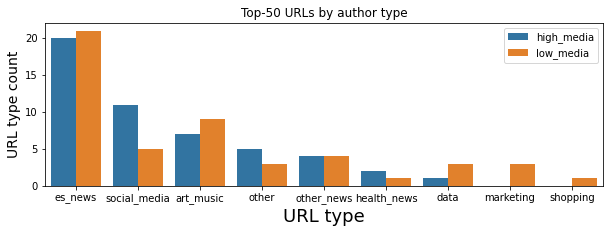

In [10]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# get counts for each author type
high_media_author_URL_type_counts = high_low_author_media_URL_types[high_low_author_media_URL_types.loc[:, 'author_type']=='high_media'].loc[:, 'URL_type'].value_counts().reset_index().assign(**{'author_type':'high_media'})
low_media_author_URL_type_counts = high_low_author_media_URL_types[high_low_author_media_URL_types.loc[:, 'author_type']=='low_media'].loc[:, 'URL_type'].value_counts().reset_index().assign(**{'author_type':'low_media'})
author_URL_type_counts = pd.concat([high_media_author_URL_type_counts, low_media_author_URL_type_counts], axis=0).rename(columns={'index':'URL_type', 'URL_type':'URL_type_count'})
plt.figure(figsize=(10,3))
sns.barplot(x='URL_type', y='URL_type_count', hue='author_type', data=author_URL_type_counts)
plt.xlabel('URL type', fontsize=18)
plt.ylabel('URL type count', fontsize=14)
plt.legend(loc='upper right')
plt.title('Top-50 URLs by author type')
plt.show()

Now let's compare the two groups by URL volume, i.e. do we see that the high media authors share social media sites at a higher proportion?

   author_type      URL_type  URL_type_pct
0   high_media     art_music      0.001088
1   high_media          data      0.000205
2   high_media       es_news      0.002716
3   high_media   health_news      0.000097
4   high_media     marketing      0.000841
6   high_media    other_news      0.000366
7   high_media      shopping      0.000011
8   high_media  social_media      0.028914
9    low_media     art_music      0.008446
10   low_media          data      0.000943
11   low_media       es_news      0.003730
12   low_media   health_news      0.000241
13   low_media     marketing      0.003154
15   low_media    other_news      0.000388
16   low_media      shopping      0.000094
17   low_media  social_media      0.007618


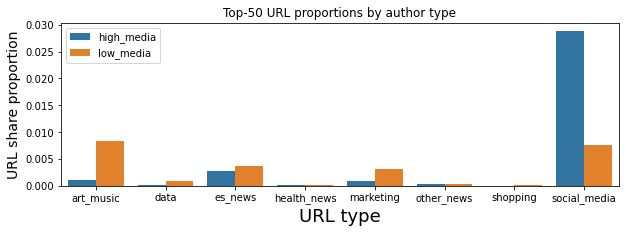

In [11]:
low_media_author_url_type_pct = low_media_author_url_pct.reset_index().rename(columns={'index' : 'URL', 0 : 'URL_pct'}).assign(**{'author_type':'low_media'})
high_media_author_url_type_pct = high_media_author_url_pct.reset_index().rename(columns={'index' : 'URL', 0 : 'URL_pct'}).assign(**{'author_type':'high_media'})
media_author_url_type_pct = pd.concat([low_media_author_url_type_pct, high_media_author_url_type_pct], axis=0)
# add URL types
media_author_url_type_pct = pd.merge(media_author_url_type_pct, high_low_author_media_URL_types.loc[:, ['URL', 'URL_type']], on='URL')
# compute URL pct per type
media_author_url_type_pct = media_author_url_type_pct.groupby(['author_type', 'URL_type']).apply(lambda x: x.loc[:, 'URL_pct'].sum()).reset_index().rename(columns={0:'URL_type_pct'})
# drop "other" type
media_author_url_type_pct = media_author_url_type_pct[~media_author_url_type_pct.loc[:, 'URL_type'].isin(['other'])]
print(media_author_url_type_pct)
# plot again
plt.figure(figsize=(10,3))
sns.barplot(x='URL_type', y='URL_type_pct', hue='author_type', data=media_author_url_type_pct)
plt.xlabel('URL type', fontsize=18)
plt.ylabel('URL share proportion', fontsize=14)
plt.legend(loc='upper left')
plt.title('Top-50 URL proportions by author type')
plt.show()

Are these differences significant?

In [19]:
from scipy.stats import norm
def binom_test(p_1, p_2, n_1, n_2):
    p_pool = (n_1*p_1 + n_2*p_2) / (n_1 + n_2)
    z_score = (p_1 - p_2) / (p_pool * (1-p_pool) * (1/n_1 + 1/n_2))**.5
    if(z_score > 0):
        p_val = (1-norm.cdf(z_score)) / 2.
    else:
        p_val = norm.cdf(z_score) / 2.
    return z_score, p_val

In [21]:
high_media_author_URL_total = high_media_author_url_counts.sum()
low_media_author_URL_total = low_media_author_url_counts.sum()
total_URL_types = media_author_url_type_pct.loc[:, 'URL_type'].nunique()
p_val_upper = 0.05 / total_URL_types
for URL_type_i, data_i in media_author_url_type_pct.groupby('URL_type'):
    high_media_URL_pct_i = data_i[data_i.loc[:, 'author_type']=='high_media'].loc[:, 'URL_type_pct'].iloc[0]
    low_media_URL_pct_i = data_i[data_i.loc[:, 'author_type']=='low_media'].loc[:, 'URL_type_pct'].iloc[0]
    high_low_diff = high_media_URL_pct_i - low_media_URL_pct_i
    z_score, p_val = binom_test(high_media_URL_pct_i, low_media_URL_pct_i, high_media_author_URL_total, low_media_author_URL_total)
    if(p_val < p_val_upper):
        print('URL type %s has diff %.3f (test stat=%.3f p=%.3E)'%(URL_type_i, high_low_diff, z_score, p_val))

URL type art_music has diff -0.007 (test stat=-23.044 p=4.228E-118)
URL type data has diff -0.001 (test stat=-6.656 p=7.011E-12)
URL type es_news has diff -0.001 (test stat=-3.878 p=2.633E-05)
URL type health_news has diff -0.000 (test stat=-2.396 p=4.145E-03)
URL type marketing has diff -0.002 (test stat=-11.194 p=1.095E-29)
URL type shopping has diff -0.000 (test stat=-2.486 p=3.232E-03)
URL type social_media has diff 0.021 (test stat=34.635 p=0.000E+00)


### Examine integrated, light verb example sentences
Let's cherry-pick some integrated and light verb example sentences to show the initial hypothesis with respect to media use.

In [1]:
# load language data
import pandas as pd
loanword_post_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', sep='\t')
native_verb_post_data = pd.read_csv('../../data/mined_tweets/native_verbs_post_social_data.tsv', sep='\t')

In [3]:
## load media sharing data
from ast import literal_eval
from data_helpers import try_literal_eval
video_data = pd.read_csv('../../data/culture_metadata/youtube_video_music_genre_data.tsv', sep='\t')
music_data = pd.read_csv('../../data/culture_metadata/spotify_track_data.tsv', sep='\t', converters={'artist_name' : try_literal_eval})
author_video_sharing_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_youtube_video_categories.tsv', sep='\t', converters={'latin_american_artist_tags':try_literal_eval, 'us_american_artist_tags':try_literal_eval})
author_music_sharing_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_author_spotify_link_data.tsv', sep='\t')
music_data.rename(columns={'id':'track_id'}, inplace=True)
# fix empty sets for artist tags
video_artist_vars = ['latin_american_artist_tags', 'us_american_artist_tags']
for video_artist_var in video_artist_vars:
    video_data = video_data.assign(**{
        video_artist_var : video_data.loc[:, video_artist_var].apply(lambda x: set() if x=='set()' else literal_eval(x) if type(x) is str else x)
    })
display(video_data.head())
display(music_data.head())
display(author_video_sharing_data.head())
display(author_music_sharing_data.head())

,youtube_id,title_artist,clean_title,clean_tags,clean_topic_categories,video_genre,has_latin_american_title_artist,has_us_american_title_artist,latin_american_artist_tags,us_american_artist_tags,has_latin_american_artist_tag,has_us_american_artist_tag,has_latin_american_music_genre_tag,has_us_american_music_genre_tag
0,s8d0-1dk8os,natalia oreiro,natalia oreiro - united by love (rusia 2018) [...,"['official video', 'latin music', 'oreiro', 'n...","['pop_music', 'music']",latin_american_music,True,False,{natalia oreiro},{},True,False,False,False
1,UIXtP-3aYJo,cristina,"cristina presidenta, dolar a 70 y el final de ...","['el destape', 'roberto navarro', 'el destape ...","['television_program', 'entertainment']",latin_american_music,True,False,{},{},False,False,False,False
2,LchaHtrMtIA,que es lo mejor de ser actriz,?que es lo mejor de ser actriz porno? | la kalle,"['la kalle', 'la kalle 96.9', 'emisora la kall...",['entertainment'],latin_american_music,False,False,{vicente fernandez},{},True,False,False,False
3,Ghywp7i032A,rels b,rels b - mejor no nos vemos (videoclip oficial),"['rels b', 'rels b video', 'rels b mejor no no...","['music', 'hip_hop_music', 'music_of_latin_ame...",latin_american_music,False,False,{},{},False,False,True,False
4,senoF0vblek,rodrigo amarante,rodrigo amarante - tuyo (narcos theme song),"['[', ""'"", 'p', 'a', 'r', 'o', 'l', 'e', 's', ...",['music'],latin_american_music,True,False,{},{},False,False,False,False


,track_id,explicit,name,album_id,album_name,album_release_date,album_available_markets,artist_id,artist_name
0,4NVzKq9K1Ryq9PSE9YyFuS,False,This Day We Fight!,0G5qC48D3MI8YBKTVwIiz1,ENDGAME,2009-09-09,78.0,['1Yox196W7bzVNZI7RBaPnf'],[Megadeth]
1,6OOk7nYKqKTCIQunirsVht,False,Somewhere Only We Know,62jIXzDsu18rooOl6dVu61,Hopes and Fears (Deluxe Edition),2009-01-01,0.0,['53A0W3U0s8diEn9RhXQhVz'],[Keane]
2,2bDENJyfbxj0neGiXUFvIX,False,Legendary,4UXg0K9s6iGFntzsrYDdWF,No Place Is Home,2018-05-25,79.0,['1xKrH6GSh9CJh8nYwbqW7B'],[Welshly Arms]
3,1qCQTy0fTXerET4x8VHyr9,False,What A Wonderful World,19UoBHanqMth4tk0rFw5RJ,What A Wonderful World,1968,74.0,['19eLuQmk9aCobbVDHc6eek'],[Louis Armstrong]
4,5KDNFlHAdDJ84fhK27c35X,True,Judith,0GeWd0yUKXHbCXVag1mJvO,Mer De Noms,2000-01-01,79.0,['4DFhHyjvGYa9wxdHUjtDkc'],[A Perfect Circle]


,id,youtube_id,clean_date,youtube_id_category,screen_name
0,1116579616578101249,2B6qerZlczw,2019-04-12 01:51:40,us_american_artist,07jun11
1,1104125307802533889,s_a1hPwXiWw,2019-03-08 16:02:41,us_american_artist,07jun11
2,1142668962427260929,EoXvDleWJ5U,2019-06-23 01:41:25,us_american_artist,13mae13
3,1134283202556829696,44_qWFAdjqQ,2019-05-30 22:19:24,us_american_artist,13mae13
4,1079330427595378689,yWEK4v9AVKQ,2018-12-30 05:56:41,us_american_artist,17_siete


,latin_american_genre,us_american_genre,track_id,artist_id,screen_name,clean_date
0,False,True,5LO0sJCkNMZYLYeGOvblLu,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:28:38
1,False,True,0TSEl91K02zqF77VMexAiV,1Yox196W7bzVNZI7RBaPnf,kikideltwit,2016-09-30 10:52:26
2,False,True,5jdi35NliqixasAmfobQzC,1Yox196W7bzVNZI7RBaPnf,dookiemosh,2019-06-17 16:14:33
3,False,True,6b6uLZsoGhObYexIxnRbIb,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:23:17
4,False,True,5a2hIQWInPjqkkFiUEgxoX,1Yox196W7bzVNZI7RBaPnf,aneuroma,2019-06-17 17:36:52


In [4]:
# add artist data
combined_author_music_sharing_data = pd.merge(author_music_sharing_data, music_data.loc[:, ['track_id', 'artist_name', 'name',]], on='track_id')
combined_author_video_sharing_data = pd.merge(author_video_sharing_data, video_data.loc[:, ['youtube_id', 'clean_title', 'latin_american_artist_tags', 'us_american_artist_tags']], on='youtube_id')
## combine everything!!
combined_author_music_sharing_data = combined_author_music_sharing_data.assign(**{
    'media_type' : 'music',
})
combined_author_video_sharing_data = combined_author_video_sharing_data.assign(**{
    'media_type' : 'video',
})
# flatten video data
flat_author_video_sharing_data = []
video_sharing_data_vars = ['youtube_id', 'youtube_id_category', 'clean_title', 'screen_name', 'media_type']
for idx_i, data_i in combined_author_video_sharing_data.iterrows():
    artist_tags = list(data_i.loc['latin_american_artist_tags'] | data_i.loc['us_american_artist_tags'])
    data_i = data_i.loc[video_sharing_data_vars].values.tolist()
    for artist_tag_j in artist_tags:
        flat_author_video_sharing_data.append([artist_tag_j,] + data_i)
flat_author_video_sharing_data = pd.DataFrame(flat_author_video_sharing_data, columns=['artist_name',]+video_sharing_data_vars)
# flatten music data
music_sharing_data_vars = ['name', 'screen_name', 'track_id', 'media_type', 'latin_american_genre', 'us_american_genre']
flat_author_music_sharing_data = []
for idx_i, data_i in combined_author_music_sharing_data.iterrows():
    artist_names = data_i.loc['artist_name']
    data_i = data_i.loc[music_sharing_data_vars].values.tolist()
    for artist_name_j in artist_names:
        flat_author_music_sharing_data.append([artist_name_j,] + data_i)
flat_author_music_sharing_data = pd.DataFrame(flat_author_music_sharing_data, columns=['artist_name',] + music_sharing_data_vars)
# fix genre column for music data
music_sharing_data_vars = ['name', 'artist_name', 'screen_name', 'track_id', 'media_type']
flat_author_music_sharing_data = flat_author_music_sharing_data.melt(id_vars=music_sharing_data_vars, value_vars=['latin_american_genre', 'us_american_genre'], var_name='music_genre', value_name='has_music_genre')
flat_author_music_sharing_data = flat_author_music_sharing_data[flat_author_music_sharing_data.loc[:, 'has_music_genre']]
flat_author_music_sharing_data.drop('has_music_genre', axis=1, inplace=True)
display(flat_author_music_sharing_data.head())
# normalize columns, data
flat_author_music_sharing_data.rename(columns={'track_id' : 'media_id', 'music_genre' : 'media_genre', 'name' : 'title'}, inplace=True)
flat_author_video_sharing_data.rename(columns={'youtube_id' : 'media_id', 'youtube_id_category' : 'media_genre', 'clean_title' : 'title'}, inplace=True)
flat_author_video_sharing_data = flat_author_video_sharing_data.assign(**{'media_genre' : flat_author_video_sharing_data.loc[:, 'media_genre'].apply(lambda x: x.replace('_artist', '_genre'))})
author_media_sharing_data = pd.concat([flat_author_music_sharing_data, flat_author_video_sharing_data], axis=0)
display(author_media_sharing_data.head())
print(author_media_sharing_data.loc[:, 'media_type'].value_counts())

,name,artist_name,screen_name,track_id,media_type,music_genre
344,Dulce Soledad,Enjambre,lafelinakebuena,0BKJNlqLlNvvIunfg2BPCg,music,latin_american_genre
345,Cámara De Faltas,Enjambre,kaarconpecas,5i8xTwcPSuez2WXdy09Y4r,music,latin_american_genre
346,Visita,Enjambre,danielasofiaav,1v15LSVQiEsGm4FK8SH7rI,music,latin_american_genre
606,Lucha De Gigantes,Nacha Pop,caarlygr,43GjYlBkIaEW2laq9D4Rr0,music,latin_american_genre
607,Vistete,Nacha Pop,esbadillo,5ZrtHP3Kzdgw8tzELrmKqA,music,latin_american_genre


,title,artist_name,screen_name,media_id,media_type,media_genre
344,Dulce Soledad,Enjambre,lafelinakebuena,0BKJNlqLlNvvIunfg2BPCg,music,latin_american_genre
345,Cámara De Faltas,Enjambre,kaarconpecas,5i8xTwcPSuez2WXdy09Y4r,music,latin_american_genre
346,Visita,Enjambre,danielasofiaav,1v15LSVQiEsGm4FK8SH7rI,music,latin_american_genre
606,Lucha De Gigantes,Nacha Pop,caarlygr,43GjYlBkIaEW2laq9D4Rr0,music,latin_american_genre
607,Vistete,Nacha Pop,esbadillo,5ZrtHP3Kzdgw8tzELrmKqA,music,latin_american_genre


music    24559
video     8626
Name: media_type, dtype: int64


Now! Let's identify authors who consistently use either the integrated verb form or the light verb form, then compare their musical sharing.

In [8]:
# get music sharing authors
author_var = 'screen_name'
media_sharing_authors = author_media_sharing_data.loc[:, author_var].unique()
media_sharing_loanword_post_data = loanword_post_data[loanword_post_data.loc[:, author_var].isin(media_sharing_authors)]
media_sharing_native_verb_post_data = native_verb_post_data[native_verb_post_data.loc[:, author_var].isin(media_sharing_authors)]
# per-author integration
loanword_var = 'loanword'
native_verb_var = 'native_word_type'
author_native_verb_integration_rate = media_sharing_native_verb_post_data.groupby([author_var, native_verb_var]).apply(lambda x: 1-(x.loc[:, 'has_light_verb'].sum() / x.shape[0])).reset_index().rename(columns={0:'integration_rate'})
author_loanword_integration_rate = media_sharing_loanword_post_data.groupby([author_var, loanword_var]).apply(lambda x: 1-(x.loc[:, 'has_light_verb'].sum() / x.shape[0])).reset_index().rename(columns={0:'integration_rate'})
display(author_loanword_integration_rate.head())
display(author_native_verb_integration_rate.head())

,screen_name,loanword,integration_rate
0,07jun11,flip,1.0
1,0osman,DM,0.0
2,13alejovm,park,1.0
3,13mae13,rock,0.0
4,1_troche,zap,0.0


,screen_name,native_word_type,integration_rate
0,07jun11,comprar,1.0
1,07jun11,copiar,1.0
2,07jun11,culpar,0.0
3,07jun11,explicar,1.0
4,07jun11,participar,1.0


In [9]:
# let's restrict to consistent media posters
media_id_var = 'media_id'
author_media_counts = author_media_sharing_data.drop_duplicates([author_var, media_id_var], inplace=False).loc[:, author_var].value_counts()
print(author_media_counts.head())
min_media_count = 3
freq_media_authors = author_media_counts[author_media_counts >= min_media_count].index.tolist()

eclipseluuunar     239
unpocodecianuro    167
tnvc_              159
MARY_KRAVEN        143
janeynoesplain     132
Name: screen_name, dtype: int64


In [10]:
# let's look at the high-integration and low-integration authors, per word
# and also their corresponding media choices
import numpy as np
np.random.seed(123)
# high integration
sample_size = 10
max_integration = 1.
max_integration_author_loanword_integration_rate = author_loanword_integration_rate[author_loanword_integration_rate.loc[:, 'integration_rate']==max_integration]
sample_authors = np.random.choice(freq_media_authors, sample_size, replace=False)
sample_author_loanword_integration_rate = max_integration_author_loanword_integration_rate[max_integration_author_loanword_integration_rate.loc[:, author_var].isin(sample_authors)]
for (author_i, word_i), data_i in sample_author_loanword_integration_rate.groupby([author_var, loanword_var]):
    print(f'testing author={author_i} word={word_i}; integration rate = %.3f'%(data_i.loc[:, 'integration_rate'].iloc[0]))
    # get media!
    media_data_i = author_media_sharing_data[author_media_sharing_data.loc[:, 'screen_name']==author_i]
    display(media_data_i.head())
    # get sample text
    text_i = loanword_post_data[(loanword_post_data.loc[:, author_var]==author_i) & (loanword_post_data.loc[:, loanword_var]==word_i)].loc[:, 'text'].iloc[0]
    print(f'sample text = <{text_i}>')

testing author=barbaraalania word=push; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <pucha pero que guapo se veia Xavier con esa camisita rosada xdcasi me lanzo encima suyo jajaja>
testing author=denymelian word=format; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Hace cuanto no formateo una notebook wacho Que paja bajar drivers xd>
testing author=mariegdrew word=fangirl; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <fangirlear en esta cuenta es muy aburrido no tengo mutuals con las que compartir mi alegría 😭😭>
testing author=soliromero word=film; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Yo soy el de la silla de ruedas, el que filma mi profesor de manejo y los fuegos artificiales la cagada que me mando https://t.co/TW9r62RRuH>
testing author=soliromero word=flash; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Paula Abdul es como una profesora de secundario que flasheó pop star>
testing author=wadamalpica word=knock; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Yo anoche cuando me noqueó el brownie. https://t.co/2UuthGkBdi>


- `alexenchochos` shares all US American music, uses integrated form for `punch`
- `osses` shares all US American music, uses integrated form for `hack`
- `cxrlxtxx` shares all Latin American music, uses integrated form for `ship`
- `teofilog` shares 50% US American/Latin American music, uses integrated form for `park`
- `valetruppi` shares 60% Latin American music, uses integrated form for `stalk`

In [11]:
# low integration
np.random.seed(123)
min_integration = 0.5
min_integration_author_loanword_integration_rate = author_loanword_integration_rate[author_loanword_integration_rate.loc[:, 'integration_rate'] <= min_integration]
sample_authors = np.random.choice(freq_media_authors, sample_size, replace=False)
sample_author_loanword_integration_rate = min_integration_author_loanword_integration_rate[min_integration_author_loanword_integration_rate.loc[:, author_var].isin(sample_authors)]
for (author_i, word_i), data_i in sample_author_loanword_integration_rate.groupby([author_var, loanword_var]):
    print(f'testing author={author_i} word={word_i}; integration rate = %.3f'%(data_i.loc[:, 'integration_rate'].iloc[0]))
    # get media!
    media_data_i = author_media_sharing_data[author_media_sharing_data.loc[:, 'screen_name']==author_i]
    display(media_data_i.head())
    # get sample text
    text_i = loanword_post_data[(loanword_post_data.loc[:, author_var]==author_i) & (loanword_post_data.loc[:, loanword_var]==word_i)].loc[:, 'text'].iloc[0]
    print(f'sample text = <{text_i}>')

testing author=avcnarrador word=boycott; integration rate = 0.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1604,gigantes do samba - cheia de manias (ao vivo),alexandre pires,avcnarrador,Cf3FUpspNi8,video,latin_american_genre
1605,gigantes do samba - cheia de manias (ao vivo),so pra contrariar,avcnarrador,Cf3FUpspNi8,video,latin_american_genre
1606,gigantes do samba - depois do prazer (ao vivo),alexandre pires,avcnarrador,aBV2FoP4IG8,video,latin_american_genre
1607,gigantes do samba - depois do prazer (ao vivo),so pra contrariar,avcnarrador,aBV2FoP4IG8,video,latin_american_genre
1608,laura pausini - la solitudine (1993),laura pausini,avcnarrador,UGki-Y1IsYM,video,latin_american_genre


sample text = <RT @BVB_Espanol: #BVB es EJEMPLO hasta para hacer un Boicot. Protestando pacíficamente, no asistiendo al estadio, haciéndole perder dinero…>
testing author=kassanmoor word=like; integration rate = 0.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Haces una pregunta en redes sociales a una empresa, te da like y follow……pero no te contesta la jodida preguntaWhy God why?>
testing author=latingeisho word=rock; integration rate = 0.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Hacer rock es fácil, y a la mayoría le sale para el orto. Uno es como un arbolito. https://t.co/iiLnOb7TA5>
testing author=pereira_nicoo word=cast; integration rate = 0.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <@NoSoyNanaOK No tuvo que hacer casting ;) el single de la pelicula fue disco de oro por ventas y le ofrecieron contrato>


Most of these people only share US American music => fits intuition among L2 speakers.

Let's use a few of these for the paper/presentation.

We need a `likear` example to match the `dar like` example.

In [12]:
sample_author_loanword_integration_rate.head()

,screen_name,loanword,integration_rate
335,avcnarrador,boycott,0.0
1437,kassanmoor,like,0.0
1532,latingeisho,rock,0.0
2081,pereira_nicoo,cast,0.0


In [13]:
filter_words = ['like']
sample_author_loanword_integration_rate = max_integration_author_loanword_integration_rate[max_integration_author_loanword_integration_rate.loc[:, loanword_var].isin(filter_words)]
np.random.seed(123)
sample_authors = np.random.choice(sample_author_loanword_integration_rate.loc[:, author_var].unique(), sample_size, replace=False)
sample_author_loanword_integration_rate = sample_author_loanword_integration_rate[sample_author_loanword_integration_rate.loc[:, author_var].isin(sample_authors)]
for (author_i, word_i), data_i in sample_author_loanword_integration_rate.groupby([author_var, loanword_var]):
    print(f'testing author={author_i} word={word_i}; integration rate = %.3f'%(data_i.loc[:, 'integration_rate'].iloc[0]))
    # get media!
    media_data_i = author_media_sharing_data[author_media_sharing_data.loc[:, 'screen_name']==author_i]
    display(media_data_i.head())
    # get sample text
    text_i = loanword_post_data[(loanword_post_data.loc[:, author_var]==author_i) & (loanword_post_data.loc[:, loanword_var]==word_i)].loc[:, 'text'].iloc[0]
    print(f'sample text = <{text_i}>')

testing author=cristinacruz97 word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2391,demi lovato - tell me you love me (official vi...,demi lovato,cristinacruz97,SM1w9PEQOE8,video,us_american_genre


sample text = <ESTOY TRATANDO DE IGNORAR EL HECHO DE QUE ME ESTÁS IGNORANDO deja de likear cosas!!!>
testing author=d3mian word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
12391,Genius (El Mendigo de Dock Sud) - En Vivo,Los Piojos,d3mian,6eKTVjfo4heGyXxOyrTSxP,music,latin_american_genre
12392,Babilonia - En Vivo,Los Piojos,d3mian,5wrQDWnRvNWJK2WZVPvYBJ,music,latin_american_genre
16000,Yendo a la Casa de Damián,El Cuarteto De Nos,d3mian,27JpiXdW4QmLwYQaQYymY2,music,latin_american_genre
18779,My Mafia,Andrés Calamaro,d3mian,2BIPwcOyl8RHd9quw85BvG,music,latin_american_genre
44785,Glory of Love,Peter Cetera,d3mian,1eyq8cjUQ2daFthW2PC2GM,music,us_american_genre


sample text = <El juego de likear comentarios de Instagram a famosos por @guaschetti y @dadatina es paco.>
testing author=ddaengay word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
39280,Playinwitme (feat. Kehlani),KYLE,ddaengay,4F1yvJfQ7gJkrcgFJQDjOr,music,us_american_genre
39281,Playinwitme (feat. Kehlani),Kehlani,ddaengay,4F1yvJfQ7gJkrcgFJQDjOr,music,us_american_genre
39282,Playinwitme (feat. Kehlani),KYLE,ddaengay,4F1yvJfQ7gJkrcgFJQDjOr,music,us_american_genre
39283,Playinwitme (feat. Kehlani),Kehlani,ddaengay,4F1yvJfQ7gJkrcgFJQDjOr,music,us_american_genre
45069,Say It Ain't So,Weezer,ddaengay,7vhhU4SsMDV8uSQlCxf1Lk,music,us_american_genre


sample text = <creo que soñé que me likearon las culisueltas>
testing author=elskamore word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
42940,The Show Must Go On - 2011 Mix,Queen,elskamore,5n6RDaGFSN88oRWuGtYAIN,music,us_american_genre


sample text = <una me likeo una publicación de tumblr que es de 2014 https://t.co/ieXrSX3Pr3>
testing author=florcizeballos word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
3266,miss bolivia - paren de matarnos (pseudo video),miss bolivia,florcizeballos,73AGPMSCiWI,video,latin_american_genre


sample text = <Me pregunto que mierda tienen en la cabeza los hombres de aprox 30 que likean fotos de nenas de 15? 😤😤 Pasó tu etapa  querido!>
testing author=hipstericia word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1067,Mala Mía,Maluma,hipstericia,62o8KoI44JfN7aYxgTnPvh,music,latin_american_genre
2264,I <3 U SO,Cassius,hipstericia,5AblLyBq3BDpDoo1vgXZYO,music,latin_american_genre
39766,Headlines,Drake,hipstericia,6LxSe8YmdPxy095Ux6znaQ,music,us_american_genre
42236,Glitter,"Tyler, The Creator",hipstericia,0qtK3XwbuG153dmwB8iepL,music,us_american_genre
43288,Banana Pancakes,Jack Johnson,hipstericia,0BgbobvykXxEvxo2HhCuvM,music,us_american_genre


sample text = <Me cringea cuando me likean o me responden tuits cuando ni los sigo, ni me siguen o lucen como viejos lesbianos, vo… https://t.co/PfY4j0ynAI>
testing author=juanquiniones word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
61345,"Sofía, La Súper Vedette",Massacre,juanquiniones,6GF1e6n1PoBbfgWFZur7tq,music,us_american_genre


sample text = <-Hola, por qué sonreís así?-Es que me likeaste unas fotos@Martinpdisalvo https://t.co/yJilt1aWg1>
testing author=matigenero word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
44882,No. 1 Party Anthem,Arctic Monkeys,matigenero,5TTGoX70AFrTvuEtqHK37S,music,us_american_genre


sample text = <@VIVA_LA_COBRA Estoy tan enamorado de esto que estás haciendo que no quiero likear todo junto para dejar algo para después.>
testing author=soniass99 word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
61367,Bang That,Disclosure,soniass99,5wKVFoSD7ppsjTvsniDGes,music,us_american_genre


sample text = <Mi mejor amiga nunca likea mis fotos creo que me odia>
testing author=soyfacui word=like; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
24236,Siempre Es Viernes En Mi Corazón,Alex Anwandter,soyfacui,0lEBA0QN4sA7jbfmZpUdr7,music,latin_american_genre
25654,Cagón,Miss Bolivia,soyfacui,1ZXjK39AJUMapy9RhqSX7p,music,latin_american_genre
26122,Otra Era,Javiera Mena,soyfacui,1kSfJ6FTfXou4dAw51xbc1,music,latin_american_genre
53121,Eurofiestón,Las Bistecs,soyfacui,1R1FlFOm4eBbJowPpNe8WT,music,us_american_genre
63106,Cagón,Miss Bolivia,soyfacui,1ZXjK39AJUMapy9RhqSX7p,music,us_american_genre


sample text = <hay gente que te likea fotos en ig pero no te sigue osea dale sos un bomba la conchs tuya>


Same thing but for authors with high native verb integration.

In [14]:
import numpy as np
np.random.seed(123)
# high integration
sample_size = 10
max_integration = 1.
max_integration_author_native_verb_integration_rate = author_native_verb_integration_rate[author_native_verb_integration_rate.loc[:, 'integration_rate']==max_integration]
sample_authors = np.random.choice(freq_media_authors, sample_size, replace=False)
sample_author_native_verb_integration_rate = max_integration_author_native_verb_integration_rate[max_integration_author_native_verb_integration_rate.loc[:, author_var].isin(sample_authors)]
for author_i, data_i in sample_author_native_verb_integration_rate.groupby(author_var):
    print(f'testing author={author_i} word={word_i}; integration rate = %.3f'%(data_i.loc[:, 'integration_rate'].iloc[0]))
    # get media!
    media_data_i = author_media_sharing_data[author_media_sharing_data.loc[:, 'screen_name']==author_i]
    display(media_data_i.head())
    for word_j in data_i.loc[:, native_verb_var].unique():
        # get sample text
        text_i = native_verb_post_data[(native_verb_post_data.loc[:, author_var]==author_i) & (native_verb_post_data.loc[:, native_verb_var]==word_j)].loc[:, 'text'].iloc[0]
        print(f'sample text = <{text_i}>')

testing author=barbaraalania word=burlar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <burlarse, todos se burlan. En EEG se burlaban feo de rosangela, también algo de micheille soifer con respecto a su peso. Burlarse es diferente de difamar. El zorro si difamo y esta bien q lo sentencien. Pero burlarse de alguien es diferente( casi todos los hacen, con intención)>
testing author=barbaraalania word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <@ Latina_pe # valgamedios ENFOCA quiere comprar @ americatv_peru eso lei sera por eso q ahora no son tan frontales como antes con canal 4(específicamente EEG)?>
testing author=barbaraalania word=dañar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <EEUU ya deberia intervenir, aquellos paises desarrollados tienen la tecnologia necesaria para apuntar al blanco(maduro y todo su gobierno) y no dañar civiles. Si esto sigue asi los 30,000,000 millones de venezolanos invadiran Perú>
testing author=barbaraalania word=dudar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <@ ShawMusica Nadie puede dudar que cantas pq para cantar rock se tiene q tener buena voz, y cuando cantaste esa canciòn el autotune no era tan popular como lo es ahora con muchos reggetoneros.https://youtu.be/cAn7twl73uU>
testing author=barbaraalania word=fugar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <@malditaternura Mejor que keiko siga en la cárcel no se vaya a fugar como hinostroza.Pero ahora seguro hara una le… https://t.co/pPdkLHXbDX>
testing author=barbaraalania word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <mirar hacia atrás una y otra vez, y a los costados de noche, claro.>
testing author=barbaraalania word=participar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <Si un cantante tiene detras un banner sobre un concierto o evento donde participa, tampoco habra cherry?..ejem: leslie shaw>
testing author=barbaraalania word=pisar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <Exacto!. Chile otorga una Visa especial que los venezolanos tramitan desde venezuela para pisar Chile. Pero Perú es un país tan tonto que solo deja entrar a cualquiera, en realidad no es Perù sino el @ GobiernoPeruano @ CancilleriaPeru>
testing author=barbaraalania word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <y pq la carta notarial no se la envian a el hermano de peluchin? acaso peluchin tambièn no formula preguntas y a el le han enviado cartas notariales por preguntar?......El hermano reclama la herencia equitativa del padre no de la madre segun dijo el hermano.>
testing author=barbaraalania word=probar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <a nadie le agrada ese tipo pero la realidad es q no hay pruebas en su contra y no esta mal q siga en la tele.>
testing author=barbaraalania word=recomendar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
6875,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6876,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6877,"leslie shaw, mau y ricky - faldita (official v...",leslie shaw,barbaraalania,58j981RpnFI,video,latin_american_genre
6878,"leslie shaw, mau y ricky - faldita (official v...",mau y ricky,barbaraalania,58j981RpnFI,video,latin_american_genre
6879,susan ochoa - ya no mas - ganadora competencia...,susan ochoa,barbaraalania,v534Ke7Tp8o,video,latin_american_genre


sample text = <@ NicolaPorcella lo que dicen es cierto, tu instagram es publico, mejor te recomendamos que cambies de abogados, como por ejemplo los del @ EstudioWarthon pic.twitter.com/6GpCZiUMkC>
testing author=denymelian word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Y mas el patova HERMANO A VER 19 AÑOS TENGO A QUIEN MIERDA LE VOY A TIRAR UN HIELO ME QIERES EXPLICAR>
testing author=denymelian word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Lindo jueves lluvioso para tomar mates y mirar anime o series>
testing author=denymelian word=probar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <No se si es por los dias de prueba o que, pero laburar con gente así, da gusto>
testing author=denymelian word=respirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <TUS PUÑALES EN MI CORAZON ME ESTAN DESANGRANDO, CADA VEZ ME CUESTA MAS PODER RESPIRAR AAAAAAAAAAAAA ESCUCHEN VOS ME FALLASTE LPM>
testing author=denymelian word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Si tus sueños mueren en una persona donde estan tus ganas de soñar>
testing author=denymelian word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <esta vez todo va a terminar, una última canción en todas estrofas escupiéndote mi sinceridad https://www.instagram.com/p/Bx-B2x4HlOw/?igshid=1i4bqdzbo0aeg …>
testing author=denymelian word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Ahora que tengo la pc puedo escuchar a los astrone' Que paja tener que usar la pc solo de noche xdxd necesito una alimentacion de monitor lpm>
testing author=denymelian word=viajar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Soy el único al que le pasa que escucho canciones y me hacen viajar a x momentos? LPM!>
testing author=denymelian word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
2695,lemkin - nunca lo olvides,sleeping with sirens,denymelian,AcCrbocYnqI,video,us_american_genre
2696,lemkin - nunca lo olvides,a day to remember,denymelian,AcCrbocYnqI,video,us_american_genre
2697,lemkin - nunca lo olvides,for all those sleeping,denymelian,AcCrbocYnqI,video,us_american_genre
2698,lemkin - nunca lo olvides,pierce the veil,denymelian,AcCrbocYnqI,video,us_american_genre
2699,lemkin - nunca lo olvides,we came as romans,denymelian,AcCrbocYnqI,video,us_american_genre


sample text = <Abrazame fuerte, no temas mas a amarNo mires hacia abajo...Te llevare a volar>
testing author=kassanmoor word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Alguna vez busco y compro pasajes/hospedaje desde el trabajo, no lo niego, pero aca hay una persona que todos ya sabemos que va a europa por que esta llamando por telefono a cada casa de cambio de Cochabamba para comprar euros durante los ultimos 3 dias>
testing author=kassanmoor word=copiar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Recuerdo cuando no sabia copiar archivos por ssh usando solo la terminal, y @ cyberduckapp era infaltable en mi laptop, ahora solo lo uso en contadas ocasiones>
testing author=kassanmoor word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <ni su tweet ni su pagina de facebook explican NADA, que es pil express? una app para el movil?>
testing author=kassanmoor word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <si quieren algo de nostalgia revivida, vean Kobra Kai, esta sorprendentemente bien hecha, continuación del Karate Kid original, primeros 2 capítulos está disponibles gratis en youtube, si no les convence solo les cuesta el tiempo de mirar esos 2 caps>
testing author=kassanmoor word=pasear; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <A ver, si tiene que elegir entre: 1- Pasear en Helicoptero 2- Leer a las respuestas de twitter 3- Jugar futbol Creo que sabemos cual no hara :V>
testing author=kassanmoor word=probar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <-Tienes una maquina no critica que puedas reiniciar para una prueba? -No, pero igual dale, yo reinicio lo que yo quiero :V>
testing author=kassanmoor word=recomendar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <estoy jugando Hollow Knight, pendiente el cuphead y algun otro indie, pero me compre 2 juegos mas porque estaban a precios ridiculos y me los recomendaron mucho>
testing author=kassanmoor word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <nunca la considere mejor pero la veia... incluso seguía viéndola cuando mis compañeros dejaron de verla, pero se puso tan mala e incoherente que la terminé dejando>
testing author=kassanmoor word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Viva mi nuevo tool deidad: virt-customize me esta salvando de hacer cosas extrañas con las virtuales, o de usar cloud-init>
testing author=kassanmoor word=viajar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Ganas de volver al Brasil, pero tengo que viajar a otro lado, :V hay algo que me impida planear el subsiguiente viaje?>
testing author=kassanmoor word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
29699,Boca Aberta,Pitty,kassanmoor,2tgHz0RZ3l9waaM0xljGWP,music,latin_american_genre
29700,Teto de Vidro - Ao Vivo,Pitty,kassanmoor,0smdadL5pFVc8FRzFBNjtA,music,latin_american_genre
29701,Lado de Lá,Pitty,kassanmoor,1AJAeWbN2FKh5Dlh5fzCpB,music,latin_american_genre
34719,Agora Só Falta Você - Ao Vivo,Rita Lee,kassanmoor,7J0N1re4mmmCl40GrW1vnY,music,latin_american_genre
56033,The Rains of Castamere,Ramin Djawadi,kassanmoor,0CHvs1UmxA90B2apIpbWCC,music,us_american_genre


sample text = <Claro, cuando a mi me toca vuelo fallido el boa volvemos al aeropuerto, y cuando les toca a otros los llevan de paseo a Las Canarias https://twitter.com/LosTiemposBol/status/1142161750307028999 …pic.twitter.com/78eUsTKJxv>
testing author=latingeisho word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Si te compraste un perro de 15 lucas por lo menos leete el manual.>
testing author=latingeisho word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Generalmente los full peronistas explicando el peronismo me causan gracia, pero los antiperonistas explicando el peronismo me dan una lástima difícil de explicar.>
testing author=latingeisho word=fugar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Nos endeudaron para siempre, la plata se fugó, no invirtieron en una mierda y no beneficiaron a ningún sector que no sea el financiero. Esto es lo más que puedo resumir al gobierno actual y lo escribo para recordarlo en el futuro.>
testing author=latingeisho word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Suben una serie entera sabiendo que la vamos a mirar de corrido, porque somos unos drogadictos de mierda sin vida, y siguen usando cliffhangers entre episodios. En algún momento debería cambiar la fórmula. Me genera intriga y emoción.>
testing author=latingeisho word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Si tiras que llevas birra y caes con una Quilmes/Brahma, no te enojes si te preguntan a dónde está la birra.>
testing author=latingeisho word=probar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Tengo un par de conocidos canas. Tengo buen trato y les doy el respeto mínimo protocolar que se le da a alguien que sabés que es un hijo de yuta pero todavía no tenes pruebas para demostrarlo.>
testing author=latingeisho word=recomendar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Amiga nuestra recomienda agarrarse primero siempre al más lindo. El otro viene solo.>
testing author=latingeisho word=saltar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Cuántos de acá saltan si cuestiono el gobierno de Allende?>
testing author=latingeisho word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Sólo cuando sueño algo bien copado.>
testing author=latingeisho word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Sé que es la edad, pero me parece que la edad de oro de los videojuegos terminó hace rato.>
testing author=latingeisho word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <Todos deberiamos usar el pelo largo.>
testing author=latingeisho word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
7546,"""""""alice in chains """"""""would?"""""""" guitar cente...",alice in chains,latingeisho,Prs439_rGwY,video,us_american_genre
7547,hide your heart legendado,paul stanley,latingeisho,i9FaAOuZL7c,video,us_american_genre
7548,hide your heart legendado,gene simmons,latingeisho,i9FaAOuZL7c,video,us_american_genre
7549,julian serrano - yo te protejo (video oficial),julian serrano,latingeisho,U1KijrF5qBg,video,latin_american_genre


sample text = <La verdad es que la sonoridad del estilo me vuela la peluca, y me parece inagotable. Claro que me gusta más cuando hay buenas letras, pero lo que mueve muchas veces es otra cosa. Nunca un género popular dio tanta variedad sonora como el rock (en un sentido amplio).>
testing author=mariegdrew word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <jejeje echaba de menos comprar merch <3pic.twitter.com/SfrpTFPOnH>
testing author=mariegdrew word=decidir; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <llevo un mes buscando móviles y no me decido pic.twitter.com/KStNYXiyjv>
testing author=mariegdrew word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <pero me puedes explicar esos ojazos señor.pic.twitter.com/jy8P8Uj5EW>
testing author=mariegdrew word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <si algún día sientes que te quieres morir, acuérdate de esa vez en un concierto en que el cantante me preguntó por… https://t.co/vMReXapSzb>
testing author=mariegdrew word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <me he levantado con un sueño terrible dispuesta a tomarme litro y medio de café pero no queda y no me da tiempo a hacer>
testing author=mariegdrew word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <jamás aprenderé a usar las preposiciones.>
testing author=mariegdrew word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
43699,Cancer,Twenty One Pilots,mariegdrew,19W5OTEcQI3ZoRW1HERMyy,music,us_american_genre
50837,Supermarket Flowers,Ed Sheeran,mariegdrew,4VuS959DSpr82t3qBqCrWG,music,us_american_genre
60058,You're Not Alone,Saosin,mariegdrew,7cITfGsdjGaTP0b5oiLL0z,music,us_american_genre


sample text = <aún me lo sigo replanteando por tener el vuelo ya y todo>
testing author=pereira_nicoo word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Yo me compré el de Natalia Oreiro a los 12, después Tu Veneno, Tercero Pies Descalzos y cuarto Dónde Están Los Ladrones? Uno por semana me acuerdo jaja igual los sigo prefiriendo>
testing author=pereira_nicoo word=decidir; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Gustos son gustos. Los que compran más música son los jovenes y a los que no les gusta el reggaeton les gusta el pop en inglés, dejo pasar 15 años desde que decidió prescindir de su contrato con la discográfica, la mayoría ni saben que canta>
testing author=pereira_nicoo word=mencionar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <No, Mujica tampoco me gusta, yo no estoy defendiendo a Kristina, mi comentario iba porque mencionaste a Venezuela y viéndolo de afuera están más cerca con Macri que con el gobierno anterior.>
testing author=pereira_nicoo word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Había leído que hacía playback en los recitales pero no me puse a mirar uno, me gusta ella y me parece que en Argentina le hacen lo mismo que le hacían a Natalia cuando empezó, ojalá no deje.>
testing author=pereira_nicoo word=participar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <si le piden que vaya a una mision tiene que aceptar por algo se comprometio, también participo de Ahiti cuado lo del terremoto, no son cuentits lindos, y a la gente que ayuda y nadie se entera porque no hace prensa con esas cosas>
testing author=pereira_nicoo word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <La vieron y le preguntaron y dijo que no>
testing author=pereira_nicoo word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Muchos de los jugadores que ahora juegan en primera eran pobres y salieron de la villa, el video es un niño que sueña con lo mismo, después muestran partes lindas del cerro, no esta representando a Uruguay>
testing author=pereira_nicoo word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Pueden fallar, además que quieren mandar en la vida de los demás? Cabezas de terminar no entienden que los abortos se hacen y se los van a seguir haciendo, que no se trata de siempre esta bien o si esta mal, si no estas a favor del aborto estas a favor del aborto clandestino>
testing author=pereira_nicoo word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <mentira, ella no tiene instagram, tiene vk y se lo hizo para estar en contacto y que no compren nada que ella no publique porque salian anuncios de recitales falsos para estafar a la gente vendiendoles entradas. Y los que no somos de Rusia también podemos usar vk...>
testing author=pereira_nicoo word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
1785,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1786,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1787,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1788,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre
1789,natalia oreiro - united by love (rusia 2018) [...,natalia oreiro,pereira_nicoo,s8d0-1dk8os,video,latin_american_genre


sample text = <Primero estuvo de extra en Aprender a Volar, Alta Comedia e Inconquistable Corazon. En Dulce Ana fue su primer personaje importante, 90-60-90 Modelos coprotagonista y Ricos y Famosos su primer protagonico.>
testing author=soliromero word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Tuve que tirar el pijama que me compré en Primark en 2014. No puedo creer lo barato que me había salido y todo lo que me duró. ¿Por qué no podemos tener eso acá?>
testing author=soliromero word=decidir; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <En el gimnasio decidieron sacar una foto grupal el día que hay 100% de humedad.pic.twitter.com/nnzzgf2wv9>
testing author=soliromero word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Obvio que el médico está atrasado y ya se superpusieron turnos. ¿Alguien me puede explicar si hay una razón o es porque simplemente son unos hijos de puta?>
testing author=soliromero word=mencionar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <En Lima todos están emocionadísimos por Perú en el Mundial. Y cuando me preguntan de qué cuadro soy, inmediatamente me mencionan a Lautaro Martínez. En tu cara, Kun Agüero (?).>
testing author=soliromero word=mirar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <A mi me gustó el show. Hermoso país tenemos y no lo solemos apreciar. Siempre miramos para afuera.>
testing author=soliromero word=multar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Cuando sea jefa de gobierno voy a multar a todos los giles que se paran en el medio de la vereda.>
testing author=soliromero word=participar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Me pasa mucho de estar mirando stories toda desparramada y participar involuntariamente en encuestas de desconocidos porque las ubican exactamente en el lugar donde está mi dedo haciendo tap.pic.twitter.com/Y1uVXWCcE0>
testing author=soliromero word=pasear; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <El viejo de truco de sacar a pasear al cachorrito>
testing author=soliromero word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Hoy vi a un motociclista riéndose con uno en monopatín eléctrico. Seguro que le preguntó cómo agarra las cunetas con ese cosito.>
testing author=soliromero word=probar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Aprovechen para probar lo mejor de la cocina nipona hasta el 19 de junio. Yo te avisé https://twitter.com/clubgastrojapo/status/1138912179514683393 …>
testing author=soliromero word=recomendar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Un gran "parala, loca" este episodio. ¿Cómo no fue derecho a la Fortaleza Roja? ¿Hay coaches de dragón allá en Westeros, Dany? Te puedo recomendar uno de acá de Tolosa.>
testing author=soliromero word=redactar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Lo redacté como el orto era "basta de". Quiero dormir.>
testing author=soliromero word=saltar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Estábamos cenando y la recepcionista del restaurant gritó "Un médico por favor!" como en las películas. Los de al lado saltaron como resorte. Siempre hay un médico en la sala. Y un abogado.>
testing author=soliromero word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <. @ zanoni dice que "LAS MÁQUINAS NO PUEDEN SOÑAR" en su nuevo libro https://inteligencia.com.ar/ Ya lo estoy leyendo para ver si puedo llevarle la contra Mentira, si te interesa la Inteligencia Artificial, bajalo.>
testing author=soliromero word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Hola, @ horaciorlarreta. Se apuraron a terminar la estacion Belgrano C del Mitre pero todo el bajo viaducto desde Sucre hasta Virrey del Pino es la boca del lobo. Es una zona de clubes y hay muchos pibes caminando solos cuando anochece. Vos fijate.>
testing author=soliromero word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Me envicié con el canal de youtube de unos pibes que muestran zapatillas. No son muy duchos frente a cámara y son fans de las Jordan (zapas que jamás usaré), pero es hipnótico.>
testing author=soliromero word=viajar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <No tomo más Uber por ese motivo. Más de una vez me dijeron "el gps me marca este camino" y sinceramente me da miedo. Además de que tengo que viajar adelante con el tipo.>
testing author=soliromero word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
5834,mariah carey - all i want for christmas is you...,mariah carey,soliromero,yXQViqx6GMY,video,us_american_genre
5835,lip sync battle with paul rudd,the roots,soliromero,4LvMeYEwWGQ,video,us_american_genre
5836,lip sync battle with paul rudd,tina turner,soliromero,4LvMeYEwWGQ,video,us_american_genre
5837,"""""""luis miguel - """"""""la bikina"""""""" (video ofic...",luis miguel,soliromero,NCvJwzDQTBM,video,latin_american_genre
5838,luis miguel - malaguena salerosa,luis miguel,soliromero,ZhWmFia_Vcs,video,latin_american_genre


sample text = <Yo por las dudas en el medio de este quilombo me saqué un vuelo a Río. Si me agarra lapocalipsis que sea en la playa con una caipi.>
testing author=wadamalpica word=castigar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Tenía como 20 años de no escuchar el nombre Lilly Téllez, desde que mi abuela veía esos noticieros en los que salía la señora en los 90s. Y ahora vuelvo a saber de ella por que quiere presentar una iniciativa para castigar el aborto. Ya siéntese señora, neta.>
testing author=wadamalpica word=comprar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Todavía la tengo, y otra que compré ese día.>
testing author=wadamalpica word=decidir; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Hasta que un día decides que no vas a llorar más. Pero lo decides mientras lloras.>
testing author=wadamalpica word=explicar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Estás entre las cosas que no puedo explicar.>
testing author=wadamalpica word=pasear; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <jajajajajajaa madame ese sale de la esquina de mi casa va hasta plaza américas, pasa por soriana, y de retache, por dónde se la llevó a pasear?>
testing author=wadamalpica word=preguntar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <La cosa es que tú te alejas dos pasos y te insisto, te pregunto. Te alejas tres pasos, me desespero, te vuelvo a insistir y a preguntar. Te alejas cuatro y lo mismo más desesperada y si eres importante hasta lloro. Te alejas cinco pasos y yo ya me alejé veinte y ya valió madre.>
testing author=wadamalpica word=recomendar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Ya estoy en esa etapa de la vida en que te recomiendo con que especialista ir o un té o remedio para cada dolencia.>
testing author=wadamalpica word=soñar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Ojalá el sueño que tenía hace rato en el trabajo, lo tuviera ahorita que es cuando me tengo que dormir. Me odio.>
testing author=wadamalpica word=terminar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Lloradita y porrito para terminar la semana.>
testing author=wadamalpica word=usar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Todo lo que no me digas, también lo voy a usar en mi contra.>
testing author=wadamalpica word=viajar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Que difícil es viajar a Durrancho, perdón Durango. ¿Cómo le hacen para llegar allá? ósea neta, no puede ser que la única puta aerolínea que llegue sea Aeroméxico y sea un pedo encontrar vuelo. Pensé que ya habían evolucionado, desde los 90s es la única aerolínea que llega.>
testing author=wadamalpica word=volar; integration rate = 1.000


,title,artist_name,screen_name,media_id,media_type,media_genre
20534,Free Yourself,The Chemical Brothers,wadamalpica,3wbdyLeVrYGv5wfSQSqwMU,music,latin_american_genre
47320,Exits,Foals,wadamalpica,79meQHFglEqxQ3YRAO1QrW,music,us_american_genre
48568,Fine Mess,Interpol,wadamalpica,6XisRktP7FOVIC3T5IbAxL,music,us_american_genre
52654,Have You Ever Seen The Rain,Creedence Clearwater Revival,wadamalpica,2LawezPeJhN4AWuSB0GtAU,music,us_american_genre
54338,Apocalypse,Cigarettes After Sex,wadamalpica,7McZS9J6h0SKoZBR6cfcFe,music,us_american_genre


sample text = <Siempre escoge volar y no dejar que nadie te haga caer.>


We see that high-integration authors almost categorically share Latin American music more frequently than US American music (exceptions `@latingeisho` `@pereira_nicoo` `@soliromero` `@waldamalpica`).

Let's look at some example posts from high-native-verb-integration and low-native-verb-integration authors to see if they exhibit more cultural conservatism in general.

In [30]:
import numpy as np
np.random.seed(123)
sample_authors = 20
max_integration = 1.
min_integration = 0.
max_integration_author_native_verb_integration_rate = author_native_verb_integration_rate[author_native_verb_integration_rate.loc[:, 'integration_rate']==max_integration]
min_integration_author_native_verb_integration_rate = author_native_verb_integration_rate[author_native_verb_integration_rate.loc[:, 'integration_rate']==min_integration]
max_integration_sample_authors = np.random.choice(max_integration_author_native_verb_integration_rate.loc[:, author_var].unique(), sample_authors, replace=False)
min_integration_sample_authors = np.random.choice(min_integration_author_native_verb_integration_rate.loc[:, author_var].unique(), sample_authors, replace=False)
sample_posts = 5
text_var = 'text'
def sample_author_posts(data, authors, sample_posts, word_var='native_word_type'):
    text_var = 'text'
    for author_i in authors:
        data_i = data[data.loc[:, author_var]==author_i]
        if(data_i.shape[0] < sample_posts):
            sample_data_i = data_i.copy()
        else:
            sample_data_i = data_i.loc[np.random.choice(data_i.index, sample_posts, replace=False), :]
        print(f'{author_i} has sample posts:')
        for idx, data_j in sample_data_i.iterrows():
            word_j = data_j.loc[word_var]
            text_j = data_j.loc[text_var]
            print(f'<{word_j}>: {text_j}')

In [31]:
# high integration
# restrict to integrated verbs
integrated_native_verb_post_data = native_verb_post_data[native_verb_post_data.loc[:, 'has_light_verb']==0]
print('max integration authors')
sample_author_posts(integrated_native_verb_post_data, max_integration_sample_authors, sample_posts, word_var=native_verb_var)

max integration authors
akiraflcl has sample posts:
<probar>: Pues prueba a desinstalar e instalar de nuevo
<recomendar>: Tengo 2 tn y yo estoy bien lo único q no recomiendo llevarlas todo el día o para estar andando mucho mucho rato
<comprar>: Si? Entonces el mcflurry te lo compraré como prometí
<terminar>: trata si puedes de terminar las cejas en punta
<respirar>: No respiramos mientras dormimos porque no nos hace falta
losprostitutas has sample posts:
<volar>: Ya estás que te vuela el chongo!
<soñar>: Dicen que el mejor momento es cuando todo el mundo se va a dormir... Y uno solo se queda viendo hacia el infinito por falta de sueño. # elmundoesunpañuelo # ungatz
<soñar>: Yo quisiera tener sueño...
<preguntar>: Últimamente me preguntan ¿vas a volver? Y yo sólo respondo: Sí, deja voy al baño a vomitar.
<comprar>: El dinero no alcanza a comprar la felicidad
tomilinza has sample posts:
<usar>: No puedo usar twitter hermano por dios
<explicar>: No hay que explicar lo ya todo el mundo sab

ineeduawake has sample posts:
<soñar>: jin se tiñó morado por que yo le dije, en un sueño
<decidir>: tengo una amiga que de esa vez que nos metimos a taller decidió seguir ese camino en la u, lo logró pero abandonó la carrera a pesar que las matemáticas le iban bien pero fue un desastre cursarlo ): ahora ya es casi profe titulada en mate
<mencionar>: yo no quiero sacar tarjeta de casa comerciales asi que hace un año le mencioné a mi ma que sacara una en ripley y accedió (no le dije para que) xd
<soñar>: no tengo sueño y no he tomado café mm
<recomendar>: Alguien me puede recomendar un autoretrato bonito?
ruggefavs has sample posts:
<terminar>: Era tan previsible que esto iba a pasar, disney tiene la idea de que todos tienen que terminar mejores amigos 💀 y m… https://t.co/JeIIWcyNmZ
<admirar>: El "fandom" en si no existe, lo que uds denominan así no son más que personas sueltas, de diferentes partes y con diferentes formas de pensar que lo único que comparten es el admirar y seguir a al

In [32]:
# low integration
print('min integration authors')
light_verb_native_verb_post_data = native_verb_post_data[native_verb_post_data.loc[:, 'has_light_verb']==1]
sample_author_posts(light_verb_native_verb_post_data, min_integration_sample_authors, sample_posts, word_var=native_verb_var)

min integration authors
ed305 has sample posts:
<pasear>: Se pasó de parranda ayer , hoy ira a dar un paseo y ya tiene listo el comunicado del Viernes.
<decidir>: Precisamente, el se metió en eso para tomar decisiones para salir de esto de una vez. Eso no se hace con marchitas, hay años de prueba. No pensara probar de nuevo
mauromdeo has sample posts:
<disculpar>: Chicos que perdonen a la Faraona porque le pidió disculpas a Botana después de que uds como seguidores, junto con el personaje, fueron a escribirle "cerda", "puerca", que a ninguno de nosotros nos gustaría que gente que no conocemos nos diga eso, y después defiendan que ...
<disculpar>: Chicos que perdonen a la Faraona porque le pidió disculpas a Botana después de que uds como seguidores, junto con el personaje, fueron a escribirle "cerda", "puerca", que a ninguno de nosotros nos gustaría que gente que no conocemos nos diga eso, y después defiendan que ...
charlieon has sample posts:
<vistar>: Echa un vistazo a esta cita. "Ha

OK! The high-integration authosr use a wider variety of verbs, longer (?) posts and seem more expressive in general (more posts).

Maybe low-integration authors share less media in general and are therefore less likely to qualify as "Latin American media" authors (since LA music is fairly rare).

### Compare rate of media sharing vs. verb integration
Let's plot the rate of media sharing and verb integration for **loanwords and native verbs** to test whether the trend is linear or more complicated.

In [33]:
# load language data
import pandas as pd
loanword_post_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', sep='\t')
native_verb_post_data = pd.read_csv('../../data/mined_tweets/native_verbs_post_social_data.tsv', sep='\t')

In [35]:
# compute integration rate per author
author_var = 'screen_name'
loanword_var = 'loanword'
native_verb_var = 'native_word_type'
light_verb_var = 'has_light_verb'
per_author_loanword_integration = loanword_post_data.groupby(author_var).apply(lambda x: x.groupby(loanword_var).apply(lambda y: 1-y.loc[:, light_verb_var].mean()).mean()).reset_index().rename(columns={0:'loanword_integration'})
per_author_native_verb_integration = native_verb_post_data.groupby(author_var).apply(lambda x: x.groupby(native_verb_var).apply(lambda x: 1-x.loc[:, light_verb_var].mean()).mean()).reset_index().rename(columns={0:'native_verb_integration'})
display(per_author_native_verb_integration)

,screen_name,0
0,000822e5bc974e0,0.900000
1,000i00i,1.000000
2,00101101k,1.000000
3,005_demmi,0.958333
4,0063_tmi,0.857143
...,...,...
33330,zyanyazs,1.000000
33331,zyroalts,1.000000
33332,zyxboss10,1.000000
33333,zzainss,0.857143


In [47]:
# combine data
import numpy as np
latin_american_media_var = 'balanced_latin_american_media_pct'
bin_latin_american_media_var = 'balanced_latin_american_media_pct_bin'
per_author_latin_american_media_pct = loanword_post_data.drop_duplicates(author_var).loc[:, [author_var, latin_american_media_var, bin_latin_american_media_var]]
per_author_integration_media_data = pd.merge(per_author_loanword_integration, per_author_native_verb_integration, on=author_var)
per_author_integration_media_data = pd.merge(per_author_integration_media_data, per_author_latin_american_media_pct, on=author_var)
per_author_integration_media_data = per_author_integration_media_data[~per_author_integration_media_data.loc[:, 'balanced_latin_american_media_pct'].apply(lambda x: np.isnan(x))]
print('%d valid authors'%(per_author_integration_media_data.shape[0]))
display(per_author_integration_media_data.head())

1488 valid authors


,screen_name,loanword_integration,native_verb_integration,balanced_latin_american_media_pct,balanced_latin_american_media_pct_bin
38,0osman,0.0,0.954545,0.000000,media_low
59,13alejovm,1.0,0.906250,1.000000,media_high
77,1800sourcream,0.0,1.000000,0.250000,media_mid
95,1iramosfdz,1.0,1.000000,0.000000,media_low
97,1justjenny1,0.0,1.000000,0.333333,media_mid


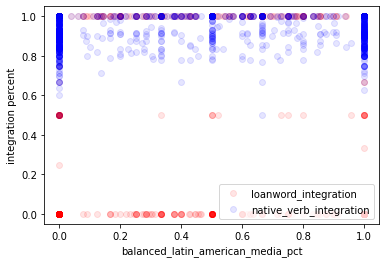

In [89]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
integration_pct_vars = ['loanword_integration', 'native_verb_integration']
colors = cycle(['r', 'b', 'k', 'y', 'g'])
for i, integration_pct_var_i in enumerate(integration_pct_vars):
    color_i = next(colors)
    plt.scatter(per_author_integration_media_data.loc[:, latin_american_media_var], per_author_integration_media_data.loc[:, integration_pct_var_i], color=color_i, alpha=0.1, label=integration_pct_var_i)
plt.xlabel(latin_american_media_var)
plt.ylabel('integration percent')
plt.legend(loc='lower right')
plt.show()

Let's just look at the middle of the distribution.

balanced_latin_american_media_pct vs. loanword_integration has correl 0.009 (p=8.644E-01)
balanced_latin_american_media_pct vs. native_verb_integration has correl 0.037 (p=4.697E-01)


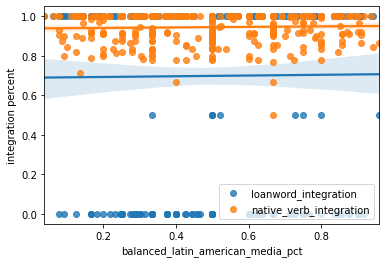

In [105]:
from scipy.stats import pearsonr
import seaborn as sns
min_integration = 0.
max_integration = 1.
integration_pct_vars = ['loanword_integration', 'native_verb_integration']
mid_val_integration_data = []
for i, integration_pct_var_i in enumerate(integration_pct_vars):
    mid_val_integration_data_i = per_author_integration_media_data[(per_author_integration_media_data.loc[:, latin_american_media_var] > min_integration) &
                                                                   (per_author_integration_media_data.loc[:, latin_american_media_var] < max_integration)]
    mid_val_integration_data_i = mid_val_integration_data_i.rename(columns={integration_pct_var_i : 'integration_pct'}).assign(**{'word_type': integration_pct_var_i})
    mid_val_integration_data_i = mid_val_integration_data_i.loc[:, [latin_american_media_var, 'integration_pct', 'word_type']]
    sns.regplot(x=latin_american_media_var, y='integration_pct', data=mid_val_integration_data_i, label=integration_pct_var_i)
    # compute linear correlation
    correl, p_val = pearsonr(mid_val_integration_data_i.loc[:, latin_american_media_var], mid_val_integration_data_i.loc[:, 'integration_pct'])
    print('%s vs. %s has correl %.3f (p=%.3E)'%(latin_american_media_var, integration_pct_var_i, correl, p_val))
#     mid_val_integration_data.append(mid_val_integration_data_i)
# mid_val_integration_data = pd.concat(mid_val_integration_data, axis=0)
# sns.scatterplot(x=latin_american_media_var, y='integration_pct', hue='word_type', data=mid_val_integration_data)
plt.xlabel(latin_american_media_var)
plt.ylabel('integration percent')
plt.legend(loc='lower right')
plt.show()

We see a more consistent trend for native verb integration, although it's not significant.

How does this look if we split by the existing media bins?

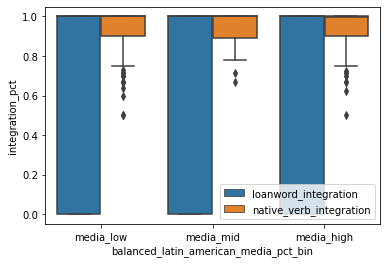

<media_low> vs. <media_mid>: test stat 50277.500 (p=4.874E-01)
<media_low> vs. <media_high>: test stat 216446.500 (p=7.915E-02)
<media_mid> vs. <media_high>: test stat 46420.500 (p=1.928E-01)
<media_low> vs. <media_mid>: test stat 50120.500 (p=4.632E-01)
<media_low> vs. <media_high>: test stat 224536.000 (p=4.913E-01)
<media_mid> vs. <media_high>: test stat 47964.500 (p=4.578E-01)


In [59]:
# first flatten
flat_per_author_integration_media_data = pd.melt(per_author_integration_media_data, value_vars=integration_pct_vars, var_name='word_type', value_name='integration_pct', id_vars=['screen_name', 'balanced_latin_american_media_pct_bin'])
# then plot => violin plot
import seaborn as sns
ordered_bins = ['media_low', 'media_mid', 'media_high']
sns.boxplot(x=bin_latin_american_media_var, y='integration_pct', hue='word_type', data=flat_per_author_integration_media_data, order=ordered_bins)
plt.legend(loc='lower right')
plt.show()
# compare medians
from scipy.stats import mannwhitneyu
for integration_var in integration_pct_vars:
    for i, bin_i in enumerate(ordered_bins):
        data_i = per_author_integration_media_data[per_author_integration_media_data.loc[:, bin_latin_american_media_var]==bin_i].loc[:, integration_var]
        for j, bin_j in enumerate(ordered_bins[(i+1):]):
            data_j = per_author_integration_media_data[per_author_integration_media_data.loc[:, bin_latin_american_media_var]==bin_j].loc[:, integration_var]
            test_stat, p_val = mannwhitneyu(data_i, data_j)
            print('<%s> vs. <%s>: test stat %.3f (p=%.3E)'%(bin_i, bin_j, test_stat, p_val))

OK! Not great. Let's try this again at the post-level and treat this as a binomial.

In [70]:
# combine data
loanword_post_data = loanword_post_data.assign(**{'post_type' : 'loanword'})
native_verb_post_data = native_verb_post_data.assign(**{'post_type' : 'native_verb'})
combined_post_data = pd.concat([loanword_post_data, native_verb_post_data], axis=0)
combined_post_data = combined_post_data.assign(**{
    'word' : combined_post_data.loc[:, 'loanword'].fillna('') + combined_post_data.loc[:, 'native_word_type'].fillna('')
})
# compute mean likelihood and SE for each post_type*media_bin
def compute_binom_SE(data):
    p = data.mean()
    N = data.shape[0]
    SE = ((p*(1-p)) / N)**.5
    return SE
post_type_var = 'post_type'
integrated_verb_var = 'integrated_verb'
light_verb_var = 'has_light_verb'
word_var = 'word'
combined_post_data = combined_post_data.assign(**{integrated_verb_var : 1-combined_post_data.loc[:, light_verb_var]})
post_media_integration_means = combined_post_data.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: y.loc[:, integrated_verb_var].mean()).mean()).reset_index().rename(columns={0:'integration_mean'})
post_media_integration_SE = combined_post_data.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: compute_binom_SE(y.loc[:, integrated_verb_var])).mean()).reset_index().rename(columns={0:'integration_SE'})

In [71]:
post_media_integration_summary_stats = pd.merge(post_media_integration_means, post_media_integration_SE, on=[post_type_var, bin_latin_american_media_var])
display(post_media_integration_summary_stats)

,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.736888,0.073503
1,loanword,media_low,0.690661,0.063039
2,loanword,media_mid,0.714998,0.039809
3,native_verb,media_high,0.788242,0.032404
4,native_verb,media_low,0.792472,0.044846
5,native_verb,media_mid,0.737899,0.049770


OK! We see a roughly linear trend for the loanwords (more media means more integration) and a U-trend for native verbs (mid-media means less integration).

Let's try this again with a control for Spanish use.

In [77]:
import numpy as np
lang_bin_var = 'es_bin'
for es_bin, es_data in combined_post_data.groupby(lang_bin_var):
    valid_es_data = es_data[~es_data.loc[:, bin_latin_american_media_var].apply(lambda x: type(x) is float and np.isnan(x))]
    print(f'testing bin={es_bin} with N=%d'%(valid_es_data.shape[0]))
    post_media_integration_means = es_data.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: y.loc[:, integrated_verb_var].mean()).mean()).reset_index().rename(columns={0:'integration_mean'})
    post_media_integration_SE = es_data.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: compute_binom_SE(y.loc[:, integrated_verb_var])).mean()).reset_index().rename(columns={0:'integration_SE'})
    post_media_integration_summary_stats = pd.merge(post_media_integration_means, post_media_integration_SE, on=[post_type_var, bin_latin_american_media_var])
    display(post_media_integration_summary_stats)

testing bin=es_high with N=623


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.875000,0.000000
1,loanword,media_low,0.800000,0.000000
2,native_verb,media_high,0.841892,0.040568
3,native_verb,media_low,0.928571,0.021122


testing bin=es_low with N=358


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.333333,0.000000
1,loanword,media_low,0.420833,0.053788
2,loanword,media_mid,0.357143,0.050508
3,native_verb,media_high,0.923077,0.000000
4,native_verb,media_low,0.794651,0.038963
5,native_verb,media_mid,0.888889,0.005514


testing bin=es_mid with N=34767


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.728766,0.071239
1,loanword,media_low,0.692796,0.064131
2,loanword,media_mid,0.719960,0.038385
3,native_verb,media_high,0.793913,0.031942
4,native_verb,media_low,0.791646,0.046143
5,native_verb,media_mid,0.737045,0.050145


Language doesn't reliably isolate the expected effect for native verbs (higher media should mean higher integration).

Let's try this with a control for location.

In [85]:
import numpy as np
location_var = 'description_location_region'
for data_bin, data_i in combined_post_data.groupby(location_var):
    valid_data_i = data_i[~(data_i.loc[:, location_var].apply(lambda x: type(x) is float and np.isnan(x))) & ~data_i.loc[:, bin_latin_american_media_var].apply(lambda x: type(x) is float and np.isnan(x))]
    if(valid_data_i.shape[0] > 0):
        print(f'testing bin={data_bin} with N=%d'%(valid_data_i.shape[0]))
        post_media_integration_means = valid_data_i.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: y.loc[:, integrated_verb_var].mean()).mean()).reset_index().rename(columns={0:'integration_mean'})
        post_media_integration_SE = valid_data_i.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: compute_binom_SE(y.loc[:, integrated_verb_var])).mean()).reset_index().rename(columns={0:'integration_SE'})
        post_media_integration_summary_stats = pd.merge(post_media_integration_means, post_media_integration_SE, on=[post_type_var, bin_latin_american_media_var])
        display(post_media_integration_summary_stats)

testing bin=UNK with N=16246


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.680985,0.062777
1,loanword,media_low,0.695304,0.057147
2,loanword,media_mid,0.739352,0.035309
3,native_verb,media_high,0.797382,0.032782
4,native_verb,media_low,0.784219,0.049390
5,native_verb,media_mid,0.784037,0.039358


testing bin=europe with N=1523


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.640625,0.013532
1,loanword,media_low,0.621795,0.024066
2,loanword,media_mid,0.250000,0.000000
3,native_verb,media_high,0.760103,0.013260
4,native_verb,media_low,0.771537,0.036078
5,native_verb,media_mid,0.811404,0.025720


testing bin=latin_america with N=10111


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.795796,0.044314
1,loanword,media_low,0.670854,0.059349
2,loanword,media_mid,0.702381,0.010310
3,native_verb,media_high,0.827010,0.054397
4,native_verb,media_low,0.855153,0.049241
5,native_verb,media_mid,0.833938,0.052633


testing bin=other with N=311


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.625000,0.088388
1,loanword,media_low,0.555556,0.000000
2,native_verb,media_high,0.929825,0.014325
3,native_verb,media_low,0.857080,0.024125


testing bin=us_america with N=747


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.630769,0.013760
1,loanword,media_low,0.656250,0.022097
2,loanword,media_mid,0.333333,0.000000
3,native_verb,media_high,0.907407,0.013095
4,native_verb,media_low,0.882397,0.028578
5,native_verb,media_mid,0.900000,0.000000


Except for `other` location, no consistent trend for native verbs.

Location + language?

In [84]:
import numpy as np
location_var = 'description_location_region'
for data_bins, data_i in combined_post_data.groupby([location_var, lang_bin_var]):
    valid_data_i = data_i[~(data_i.loc[:, location_var].apply(lambda x: type(x) is float and np.isnan(x))) & ~data_i.loc[:, bin_latin_american_media_var].apply(lambda x: type(x) is float and np.isnan(x))]
    if(valid_data_i.shape[0] > 0):
        print(f'testing bins={data_bins} with N=%d'%(valid_data_i.shape[0]))
        post_media_integration_means = valid_data_i.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: y.loc[:, integrated_verb_var].mean()).mean()).reset_index().rename(columns={0:'integration_mean'})
        post_media_integration_SE = valid_data_i.groupby([post_type_var, bin_latin_american_media_var]).apply(lambda x: x.groupby(word_var).apply(lambda y: compute_binom_SE(y.loc[:, integrated_verb_var])).mean()).reset_index().rename(columns={0:'integration_SE'})
        post_media_integration_summary_stats = pd.merge(post_media_integration_means, post_media_integration_SE, on=[post_type_var, bin_latin_american_media_var])
        display(post_media_integration_summary_stats)

testing bins=('UNK', 'es_high') with N=120


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,1.000000,0.000000
1,native_verb,media_high,0.888462,0.005843


testing bins=('UNK', 'es_low') with N=180


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_low,0.266667,0.000000
1,loanword,media_mid,0.500000,0.070711
2,native_verb,media_low,0.838068,0.018821
3,native_verb,media_mid,0.866071,0.008266


testing bins=('UNK', 'es_mid') with N=15946


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.679857,0.063299
1,loanword,media_low,0.712230,0.059843
2,loanword,media_mid,0.739048,0.030132
3,native_verb,media_high,0.801754,0.032654
4,native_verb,media_low,0.785498,0.048642
5,native_verb,media_mid,0.787711,0.036417


testing bins=('europe', 'es_high') with N=121


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.000000,0.0
1,loanword,media_low,1.000000,0.0
2,native_verb,media_high,0.882353,0.0
3,native_verb,media_low,0.866667,0.0


testing bins=('europe', 'es_low') with N=17


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_low,0.5,0.0
1,native_verb,media_low,1.0,0.0


testing bins=('europe', 'es_mid') with N=1385


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.645833,0.017010
1,loanword,media_low,0.590278,0.026072
2,loanword,media_mid,0.250000,0.000000
3,native_verb,media_high,0.770940,0.016031
4,native_verb,media_low,0.764697,0.037990
5,native_verb,media_mid,0.811404,0.025720


testing bins=('latin_america', 'es_high') with N=311


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.750000,0.000000
1,loanword,media_low,1.000000,0.000000
2,native_verb,media_high,0.866626,0.035722
3,native_verb,media_low,0.977778,0.019876


testing bins=('latin_america', 'es_low') with N=73


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.200000,0.000000
1,loanword,media_low,0.500000,0.000000
2,loanword,media_mid,0.000000,0.000000
3,native_verb,media_high,0.923077,0.000000
4,native_verb,media_low,0.982143,0.015465


testing bins=('latin_america', 'es_mid') with N=9727


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.795031,0.041658
1,loanword,media_low,0.673284,0.060185
2,loanword,media_mid,0.702381,0.010310
3,native_verb,media_high,0.840018,0.046024
4,native_verb,media_low,0.855677,0.049260
5,native_verb,media_mid,0.833938,0.052633


testing bins=('other', 'es_mid') with N=311


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.625000,0.088388
1,loanword,media_low,0.555556,0.000000
2,native_verb,media_high,0.929825,0.014325
3,native_verb,media_low,0.857080,0.024125


testing bins=('us_america', 'es_low') with N=10


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_mid,1.0,0.0
1,native_verb,media_mid,1.0,0.0


testing bins=('us_america', 'es_mid') with N=737


,post_type,balanced_latin_american_media_pct_bin,integration_mean,integration_SE
0,loanword,media_high,0.630769,0.013760
1,loanword,media_low,0.656250,0.022097
2,loanword,media_mid,0.200000,0.000000
3,native_verb,media_high,0.907407,0.013095
4,native_verb,media_low,0.882397,0.028578
5,native_verb,media_mid,0.888889,0.000000


Again, no real consistent patterns except for some of the smaller sub-groups like `LOC=other,LANG=es_mid`.

### Intrinsic evaluation: examine author profiles
We've looked at the differences in posting behavior between high-media and low-media authors, now let's look for differences in their profile information.

- H1: People who share more Latin American media will tend to display Latin American markers (emoji, words) at a higher rate than people who share more US American media.

In [106]:
import pandas as pd
loanword_author_data = pd.read_csv('../../data/mined_tweets/loanword_verb_posts_CLUSTER=twitter_posts_STARTDATE=2017_7_9_ENDDATE=2019_4_6.tsv', sep='\t', usecols=['user_screen_name', 'user_description'])
loanword_author_data.fillna('', inplace=True)
# get rid of null descriptions
loanword_author_data = loanword_author_data[loanword_author_data.loc[:, 'user_description']!='']
loanword_author_data.rename(columns={'user_screen_name' : 'screen_name'},inplace=True)
display(loanword_author_data.head())

,screen_name,user_description
0,GarraChavista,100% a la izquierda
1,EmmanuelKiller5,"Felicidad?Que es eso, lo que todos siempre me ..."
2,DaniTolocirio13,#21. Me gusta Love Live. Reborn. Baraggan y Es...
3,VCF973,.
4,RedbuHD,ImRedbuh - 13 Wins UHC - Peruvian#PalomasArmy ...


In [107]:
import numpy as np
loanword_author_media_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_author_media_sharing.tsv', sep='\t')
media_bins = [0., 0.1, 0.5]
loanword_author_media_data = loanword_author_media_data.assign(**{
    'latin_american_media_bin' : loanword_author_media_data.loc[:, 'latin_american_media_pct'].apply(lambda x: np.digitize(x, media_bins))
})
media_bin_names = ['low_LA_media', 'mid_LA_media', 'high_LA_media']
media_bin_name_lookup = dict(zip(range(1,len(media_bin_names)+1), media_bin_names))
loanword_author_media_data = loanword_author_media_data.assign(**{
    'latin_american_media_bin' : loanword_author_media_data.loc[:, 'latin_american_media_bin'].apply(media_bin_name_lookup.get)
})
display(loanword_author_media_data.head())

,screen_name,latin_american_artist_video_pct,latin_american_artist_video_count,us_american_artist_video_count,total_video_count,total_music_count,latin_american_music_genre_count,us_american_music_genre_count,latin_american_music_genre_pct,latin_american_media_pct,latin_american_media_count,us_american_media_count,media_count,media_URL_pct,latin_american_media_bin
0,05vmar_,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,1.0,0.009434,high_LA_media
1,07jun11,0.000000,0.0,2.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.0,2.0,0.012903,low_LA_media
2,0osman,0.200000,3.0,12.0,15.0,15.0,2.0,12.0,0.133333,0.166667,5.0,24.0,30.0,0.053860,mid_LA_media
3,111_scarlet,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,1.0,0.037037,low_LA_media
4,13alejovm,0.636364,7.0,4.0,11.0,0.0,0.0,0.0,0.000000,0.636364,7.0,4.0,11.0,NaN,high_LA_media


Let's first try to process the description text.

In [108]:
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import load_lang_id_model, BasicTokenizer, clean_txt_simple
lang = 'spanish'
lang_id_model = load_lang_id_model()
loanword_author_data = loanword_author_data.assign(**{
    'lang' : loanword_author_data.loc[:, 'user_description'].apply(lambda x: lang_id_model.classify(x))
})
# clean up language data
loanword_author_data = loanword_author_data.assign(**{
    'lang' : list(zip(*loanword_author_data.loc[:, 'lang'].values))[0],
    'lang_score' : list(zip(*loanword_author_data.loc[:, 'lang'].values))[1]
})
loanword_author_data = loanword_author_data.assign(**{
    'clean_user_description' : loanword_author_data.loc[:, 'user_description'].apply(clean_txt_simple)
})

In [109]:
lang_score_cutoff = 0.9
clean_loanword_author_data = loanword_author_data[(loanword_author_data.loc[:, 'lang']=='es') & 
                                                  (loanword_author_data.loc[:, 'lang_score'] >= lang_score_cutoff)]
print(clean_loanword_author_data.shape[0])
# combine with media data
clean_loanword_media_data = pd.merge(clean_loanword_author_data, loanword_author_media_data.loc[:, ['screen_name', 'latin_american_media_bin']], on='screen_name')
clean_loanword_media_data.drop_duplicates('screen_name', inplace=True)
print('%d authors with media data'%(clean_loanword_media_data.shape[0]))
# fix index
clean_loanword_media_data.index = list(range(clean_loanword_media_data.shape[0]))
display(clean_loanword_media_data.head())

37961
1785 authors with media data


,screen_name,user_description,lang,lang_score,clean_user_description,latin_american_media_bin
0,alexdeleo97,Platino III Main Alistar | 19 fucking años y o...,es,1.0,platino iii main alistar | 19 fucking anos y o...,low_LA_media
1,yerardjimenez,"Ataráxico // Advertiser, amateur writer, bloge...",es,1.0,"ataraxico // advertiser, amateur writer, bloge...",high_LA_media
2,lagranciudad,Somos una mezcla de medios con información de ...,es,1.0,somos una mezcla de medios con informacion de ...,high_LA_media
3,fermosan_tires,Creo en el trabajo y el sacrificio diario. Dio...,es,1.0,creo en el trabajo y el sacrificio diario. dio...,low_LA_media
4,isizgz,"22. F.P.G.S. Administración y finanzas, IES It...",es,1.0,"22. f.p.g.s. administracion y finanzas, ies it...",low_LA_media


What are some of the biggest differences between the author media groups?

In [110]:
# let's do token ratio first
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
stop_words = get_stop_words('es')
# add punctuation
punct = "' \" . , ! : | ? ( ) [ ] - ... $ % & / \\ `` '' ||".split(' ')
stop_words += punct
lang_long = 'spanish'
tokenizer = BasicTokenizer(lang=lang_long)
cv = CountVectorizer(min_df=0.0001, max_df=0.75, stop_words=stop_words, tokenizer=tokenizer.tokenize)
description_dtm = cv.fit_transform(clean_loanword_media_data.loc[:, 'clean_user_description'].values)
idx_vocab_lookup = {v : k for k,v in cv.vocabulary_.items()}
vocab = list(zip(*sorted(idx_vocab_lookup.items(), key=lambda x: x[0])))[1]
print(vocab[:10])

('#', "''hago", "''se", "'17", "'91", "'98.ya", "'beia", "'cantando", "'colo", "'dedicado")


In [111]:
# top words overall
description_word_counts = np.array(description_dtm.sum(axis=0))[0]
description_word_counts = pd.Series(description_word_counts, index=vocab).sort_values(inplace=False, ascending=False)
# normalize
description_word_counts = description_word_counts / description_word_counts.sum()
print(description_word_counts.head(20))

#             0.020464
@             0.020117
vida          0.007804
mas           0.006474
si            0.005723
musica        0.004509
ser           0.004278
http          0.003815
amante        0.003757
gusta         0.003584
siempre       0.003526
amo           0.003122
estudiante    0.002948
mundo         0.002775
cosas         0.002717
solo          0.002659
quiero        0.002659
cine          0.002543
periodista    0.002370
mejor         0.002197
dtype: float64


What are the differences in high/medium/low media sharing?

In [117]:
media_word_counts = []
media_word_raw_counts = []
media_bin_var = 'latin_american_media_bin'
for media_bin_i, data_i in clean_loanword_media_data.groupby(media_bin_var):
    dtm_i = description_dtm[data_i.index, :]
    word_counts_i = np.array(dtm_i.sum(axis=0))[0]
    word_counts_i = pd.Series(word_counts_i, index=vocab)
    word_counts_norm_i = word_counts_i / word_counts_i.sum()
    word_ratio_i = word_counts_norm_i / description_word_counts
    word_ratio_i.sort_values(inplace=True, ascending=False)
    print(f'media bin {media_bin_i}')
    display(word_ratio_i.head(10))
    media_word_counts.append([media_bin_i, word_counts_i, word_counts_norm_i])
media_word_count_bins, media_word_raw_counts, media_word_counts = list(zip(*media_word_counts))
combined_media_bin_word_counts = pd.concat(media_word_counts, axis=1)
combined_media_bin_raw_word_counts = pd.concat(media_word_raw_counts, axis=1)
combined_media_bin_word_counts.columns = media_word_count_bins
combined_media_bin_raw_word_counts.columns = media_word_count_bins
display(combined_media_bin_word_counts.head())

media bin high_LA_media


~tus            2.943008
irreverencia    2.943008
deuvede_fm      2.943008
detras          2.943008
detecta         2.943008
sangro          2.943008
sanguche        2.943008
sanidad         2.943008
detallista      2.943008
ira             2.943008
dtype: float64

media bin low_LA_media


pink        2.106295
arroz       2.106295
pianista    2.106295
pongo       2.106295
fernando    2.106295
by          2.106295
but         2.106295
river       2.106295
sentido     2.106295
comedia     2.106295
dtype: float64

media bin mid_LA_media


innovadoras    5.392456
e-sports       5.392456
riendo         5.392456
mediatico      5.392456
ricky          5.392456
economico      5.392456
megafon        5.392456
earthbender    5.392456
telco          5.392456
dying          5.392456
dtype: float64

,high_LA_media,low_LA_media,mid_LA_media
#,0.021776,0.020334,0.018392
''hago,0.000000,0.000122,0.000000
''se,0.000000,0.000122,0.000000
'17,0.000000,0.000122,0.000000
'91,0.000000,0.000122,0.000000


OK! No obvious differences except rate of `EN` among low LA media sharers.

Let's compare the rate of people mentioning Latin American countries, European countries and US countries.

In [125]:
from functools import reduce
latin_american_countries = ['argentina', 'bolivia', 'brazil', 'brasil', 'chile', 'colombia', 'ecuador', 'guyana', 'paraguay', 'peru', 'suriname', 'uruguay', 'venezuela', 'belize', 'guatemala', 'honduras', 'mexico', 'nicaragua', 'panama']
europe_countries = ['espana', 'spain']
us_countries = ['usa', 'america']
region_names = ['latin_america', 'europe', 'us']
region_countries = [latin_american_countries, europe_countries, us_countries]
all_countries = set(reduce(lambda x,y: x+y, region_countries))
all_countries = list(all_countries & set(combined_media_bin_word_counts.index))
all_countries_word_counts = combined_media_bin_raw_word_counts.loc[all_countries, :].sum(axis=0)
combined_region_media_counts = []
for region_name, region_country_list in zip(region_names, region_countries):
    print(f'testing {region_name}')
    valid_countries = list(set(region_country_list) & set(combined_media_bin_word_counts.index))
    # ratio of countries in region_i to all countries
    region_country_raw_counts = combined_media_bin_raw_word_counts.loc[valid_countries, :].sum(axis=0)
    region_country_counts = region_country_raw_counts / all_countries_word_counts
    print('normalized counts')
    display(region_country_counts)
    combined_region_media_counts.append(region_country_raw_counts)
    # normalized
#     print('normalized counts')
#     region_country_counts = region_country_counts / all_countries_word_counts
#     display(region_country_counts)
#     combined_media_location_prob.append(region_country_counts)
combined_region_media_counts = pd.concat(combined_region_media_counts, axis=1)
combined_region_media_counts.columns = region_names

testing latin_america
normalized counts


high_LA_media    0.724138
low_LA_media     0.700000
mid_LA_media     0.875000
dtype: float64

testing europe
normalized counts


high_LA_media    0.172414
low_LA_media     0.150000
mid_LA_media     0.000000
dtype: float64

testing us
normalized counts


high_LA_media    0.103448
low_LA_media     0.150000
mid_LA_media     0.125000
dtype: float64

In [129]:
# test significance with binomial test
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import binom_test
bin_vars = combined_region_media_counts.index
test_vars = combined_region_media_counts.columns
for test_var_k in test_vars:
    print(f'testing var {test_var_k}')
    for i, bin_var_i in enumerate(bin_vars):
        p_i = combined_region_media_counts.loc[bin_var_i, test_var_k] / combined_region_media_counts.loc[bin_var_i, :].sum()
        n_i = combined_region_media_counts.loc[bin_var_i, :].sum()
        for j, bin_var_j in enumerate(bin_vars[(i+1):]):
            p_j = combined_region_media_counts.loc[bin_var_j, test_var_k] / combined_region_media_counts.loc[bin_var_j, :].sum()
            n_j = combined_region_media_counts.loc[bin_var_j, :].sum()
            test_stat, p_val = binom_test(p_i, p_j, n_i, n_j)
            print(f'%s vs. %s; test stat = %.3f (p=%.3E)'%(bin_var_i, bin_var_j, test_stat, p_val))

testing var latin_america
high_LA_media vs. low_LA_media; test stat = 0.184 (p=4.271E-01)
high_LA_media vs. mid_LA_media; test stat = -0.880 (p=1.893E-01)
low_LA_media vs. mid_LA_media; test stat = -0.966 (p=1.670E-01)
testing var europe
high_LA_media vs. low_LA_media; test stat = 0.209 (p=4.174E-01)
high_LA_media vs. mid_LA_media; test stat = 1.263 (p=1.033E-01)
low_LA_media vs. mid_LA_media; test stat = 1.159 (p=1.232E-01)
testing var us
high_LA_media vs. low_LA_media; test stat = -0.489 (p=3.126E-01)
high_LA_media vs. mid_LA_media; test stat = -0.174 (p=4.310E-01)
low_LA_media vs. mid_LA_media; test stat = 0.171 (p=4.322E-01)


OK! 
- Latin America: low_media < high_media < mid_media
- Europe: mid_media < low_media < high_media
- US: high_media < mid_media < low_media

Let's test language: how many standard English and Spanish words do the different groups use?

In [132]:
en_words = set(map(lambda x: x.strip(), open('../../data/loanword_resources/EN_only_words.txt', 'r', encoding='ISO-8859-1')))
es_words = set(map(lambda x: x.strip(), open('../../data/loanword_resources/ES_words.txt', 'r', encoding='ISO-8859-1')))
en_only_words = en_words - es_words
es_only_words = es_words - en_words

In [138]:
lang_word_lists = [en_only_words, es_only_words]
lang_names = ['EN', 'ES']
combined_lang_words = set(reduce(lambda x,y: x|y, lang_word_lists)) & set(combined_media_bin_word_counts.index)
combined_lang_word_counts = combined_media_bin_raw_word_counts.loc[combined_lang_words, :].sum(axis=0)
combined_lang_media_counts = []
for lang_word_list, lang_name in zip(lang_word_lists, lang_names):
    print(f'testing {lang_name}')
    valid_words = list(set(lang_word_list) & set(combined_media_bin_word_counts.index))
    lang_word_counts = combined_media_bin_raw_word_counts.loc[valid_words, :].sum(axis=0)
    combined_lang_media_counts.append(lang_word_counts)
    lang_word_counts = lang_word_counts / combined_lang_word_counts
    print('normalized counts')
    display(lang_word_counts)
    # normalized
#     print('normalized counts')
#     lang_word_counts = lang_word_counts / combined_lang_word_counts
#     display(lang_word_counts)
combined_lang_media_counts = pd.concat(combined_lang_media_counts, axis=1)
combined_lang_media_counts.columns = lang_names

testing EN
normalized counts


high_LA_media    0.105600
low_LA_media     0.157822
mid_LA_media     0.141409
dtype: float64

testing ES
normalized counts


high_LA_media    0.894400
low_LA_media     0.842178
mid_LA_media     0.858591
dtype: float64

In [139]:
from data_helpers import binom_test
bin_vars = combined_lang_media_counts.index
test_vars = combined_lang_media_counts.columns
for test_var_k in test_vars:
    print(f'testing var {test_var_k}')
    for i, bin_var_i in enumerate(bin_vars):
        p_i = combined_lang_media_counts.loc[bin_var_i, test_var_k] / combined_lang_media_counts.loc[bin_var_i, :].sum()
        n_i = combined_lang_media_counts.loc[bin_var_i, :].sum()
        for j, bin_var_j in enumerate(bin_vars[(i+1):]):
            p_j = combined_lang_media_counts.loc[bin_var_j, test_var_k] / combined_lang_media_counts.loc[bin_var_j, :].sum()
            n_j = combined_lang_media_counts.loc[bin_var_j, :].sum()
            test_stat, p_val = binom_test(p_i, p_j, n_i, n_j)
            print(f'%s vs. %s; test stat = %.3f (p=%.3E)'%(bin_var_i, bin_var_j, test_stat, p_val))

testing var EN
high_LA_media vs. low_LA_media; test stat = -7.081 (p=7.141E-13)
high_LA_media vs. mid_LA_media; test stat = -3.992 (p=3.278E-05)
low_LA_media vs. mid_LA_media; test stat = 1.717 (p=4.297E-02)
testing var ES
high_LA_media vs. low_LA_media; test stat = 7.081 (p=7.141E-13)
high_LA_media vs. mid_LA_media; test stat = 3.992 (p=3.278E-05)
low_LA_media vs. mid_LA_media; test stat = -1.717 (p=4.297E-02)


In [164]:
combined_lang_media_counts_sum

high_LA_media    3750
low_LA_media     5069
mid_LA_media     1973
dtype: int64

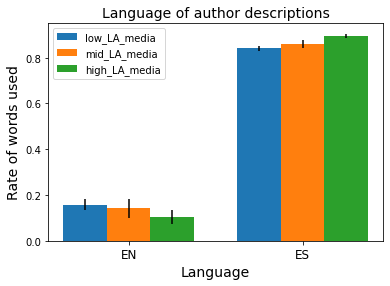

In [180]:
# make bar plots too!!
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# compute mean, SE for each combo
lang_names = ['EN', 'ES']
M = len(lang_names)
combined_lang_media_counts_sum = combined_lang_media_counts.sum(axis=1)
ordered_bins = ['low_LA_media', 'mid_LA_media', 'high_LA_media']
N = len(ordered_bins)
bar_offset = 0.25
bar_width = 0.25
X = np.arange(M)
critical_val = scipy.stats.norm.ppf(0.975)
# for i, lang_name_i in enumerate(lang_names):
#     media_lang_counts_i = combined_lang_media_counts.loc[:, lang_name_i]
#     media_lang_prob_i = media_lang_counts_i / combined_lang_media_counts_sum
#     # compute SE
#     media_lang_SE_i = (((media_lang_prob_i * (1-media_lang_prob_i)) / combined_lang_media_counts_sum)**.5)*critical_val
#     X_i = X + ((i-1/M)*bar_offset)
#     plt.bar(X_i, media_lang_prob_i, width=bar_width, label=lang_name_i)
#     plt.errorbar(X_i, media_lang_prob_i, yerr=media_lang_SE_i, linestyle='', color='k')
combined_lang_media_counts_sum = combined_lang_media_counts.sum(axis=1)
for i, media_bin_i in enumerate(ordered_bins):
    media_lang_counts_i = combined_lang_media_counts.loc[media_bin_i, :]
    media_lang_counts_i_sum = media_lang_counts_i.sum()
    media_lang_prob_i = media_lang_counts_i / media_lang_counts_i_sum
    # compute SE
    media_lang_SE_i = (((media_lang_prob_i * (1-media_lang_prob_i)) / media_lang_counts_i)**.5)*critical_val
    X_i = X + ((i-N/2+0.5)*bar_offset)
    plt.bar(X_i, media_lang_prob_i, width=bar_width, label=media_bin_i)
    plt.errorbar(X_i, media_lang_prob_i, yerr=media_lang_SE_i, linestyle='', color='k')
plt.xticks(X, lang_names, fontsize=12)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Rate of words used', fontsize=14)
plt.legend(loc='upper left')
plt.title('Language of author descriptions', fontsize=14)
plt.show()

In [174]:
media_lang_counts_i

EN     396
ES    3354
Name: high_LA_media, dtype: int64

Great! As expected:

- English words: high_media < mid_media < low_media
- Spanish words: low_media < mid_media < high_media

TODO: Let's test cultural affiliation: how differences in name mentions? Requires NER...UGH

Let's compare hashtag use and @-user mentions among the different groups.

In [213]:
import re
hashtag_matcher = re.compile('#[a-z0-9_]+')
user_matcher = re.compile('@[a-z0-9_]+')
clean_loanword_media_data = clean_loanword_media_data.assign(**{
    'hashtags' : clean_loanword_media_data.loc[:, 'clean_user_description'].apply(lambda x: hashtag_matcher.findall(x))
})
clean_loanword_media_data = clean_loanword_media_data.assign(**{
    'users' : clean_loanword_media_data.loc[:, 'clean_user_description'].apply(lambda x: user_matcher.findall(x))
})

In [222]:
from functools import reduce
author_description_hashtag_counts = pd.Series(list(reduce(lambda x,y: x+y, clean_loanword_media_data.loc[:, 'hashtags'].values))).value_counts()
author_description_user_counts = pd.Series(list(reduce(lambda x,y: x+y, clean_loanword_media_data.loc[:, 'users'].values))).value_counts()
author_description_hashtag_counts = author_description_hashtag_counts / author_description_hashtag_counts.sum()
author_description_user_counts = author_description_user_counts / author_description_user_counts.sum()
print(author_description_hashtag_counts)
print(author_description_user_counts)

#1                0.008571
#musica           0.008571
#gamer            0.005714
#marketing        0.005714
#socialmedia      0.005714
                    ...   
#noalaguerra      0.002857
#yonolovote       0.002857
#stopsofistas     0.002857
#vivirviviendo    0.002857
#mezcal           0.002857
Length: 339, dtype: float64
@gmail              0.032070
@s                  0.005831
@elperiodico        0.005831
@ecam_              0.005831
@logosincubadora    0.002915
                      ...   
@planetacabezon     0.002915
@diputadosuy        0.002915
@mural              0.002915
@rosavientos        0.002915
@google             0.002915
Length: 330, dtype: float64


These counts are sparse but we'll see what the most-popular in each category are to see if there is any consistency.

In [227]:
for media_bin_i, data_i in clean_loanword_media_data.groupby('latin_american_media_bin'):
    print(f'testing media bin {media_bin_i}')
    hashtag_counts_i = pd.Series(list(reduce(lambda x,y: x+y, data_i.loc[:, 'hashtags'].values))).value_counts()
    hashtag_counts_i = hashtag_counts_i / hashtag_counts_i.sum()
    hashtag_ratio_i = (hashtag_counts_i / author_description_hashtag_counts).dropna(inplace=False).sort_values(inplace=False, ascending=False)
    display(hashtag_ratio_i.head(10))

testing media bin high_LA_media


#yosoyradioncologo        2.734375
#gintonics                2.734375
#ehealth                  2.734375
#elcaosinmarcesible       2.734375
#eldoctordelafelicidad    2.734375
#elojodelosmuertos        2.734375
#enmovimiento             2.734375
#ernestilandia            2.734375
#esconeducacion           2.734375
#esospequenosgestos       2.734375
dtype: float64

testing media bin low_LA_media


#zquad               2.134146
#mikiroque26         2.134146
#icts                2.134146
#hoseok              2.134146
#horoscopoconalma    2.134146
#hemoal              2.134146
#heforshe            2.134146
#got                 2.134146
#goniners            2.134146
#fujifilm210         2.134146
dtype: float64

testing media bin mid_LA_media


#yoteavise          6.034483
#yonovoteporella    6.034483
#iluso              6.034483
#guapisimo          6.034483
#geek               6.034483
#fan                6.034483
#epigrafe           6.034483
#elevento40         6.034483
#doglover           6.034483
#dkv98              6.034483
dtype: float64

OK! The hashtags have a language difference, with more `EN` among low Latin American media authors and more `ES` among high Latin American media authors

In [229]:
for media_bin_i, data_i in clean_loanword_media_data.groupby('latin_american_media_bin'):
    print(f'testing media bin {media_bin_i}')
    user_counts_i = pd.Series(list(reduce(lambda x,y: x+y, data_i.loc[:, 'users'].values))).value_counts()
    user_counts_i = user_counts_i / user_counts_i.sum()
    user_counts_i = user_counts_i / user_counts_i.sum()
    user_ratio_i = (user_counts_i / author_description_user_counts).dropna(inplace=False).sort_values(inplace=False, ascending=False)
    display(user_ratio_i.head(10))

testing media bin high_LA_media


@zalajape             3.0625
@informativo102       3.0625
@ellongino            3.0625
@elpoderdetumusica    3.0625
@exitoina             3.0625
@forestoso            3.0625
@frente_amplio        3.0625
@gamelx               3.0625
@gloriatrevi          3.0625
@goldenbookcl         3.0625
dtype: float64

testing media bin low_LA_media


@xxxauron           2.302013
@esapasionante      2.302013
@flimcast           2.302013
@filmfilicos        2.302013
@femsa              2.302013
@fanelprograma      2.302013
@everyone           2.302013
@espaciopangea      2.302013
@elultimoblogizq    2.302013
@foro_tv            2.302013
dtype: float64

testing media bin mid_LA_media


@yaparate40        4.182927
@informativost5    4.182927
@evufesio          4.182927
@f_blanquiazul     4.182927
@fcomunav          4.182927
@g3basket          4.182927
@gkillcitycom      4.182927
@google            4.182927
@imfacui           4.182927
@intertelas        4.182927
dtype: float64

No obvious language difference here, but there may be a difference in types of accounts.

- High LA media authors share music/entertainment accounts
- Low LA media authors share more media accounts => more exposure to non-LA media?

### Investigate media count distributions
We would like to test another way of identifying authors' cultural attitudes, though raw counts of media use. 

Let's look at the distribution of raw counts for Latin American/Spanish media, US/UK media and other media.

In [270]:
import pandas as pd
loanword_author_media_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_author_media_sharing_balanced.tsv', sep='\t')

In [271]:
display(loanword_author_media_data.head())

,screen_name,latin_american_artist_video_count,us_american_artist_video_count,latin_american_artist_video_pct,latin_american_music_genre_count,us_american_music_genre_count,latin_american_music_genre_pct,latin_american_media_count,us_american_media_count,latin_american_media_pct,total_music_count,total_video_count,media_count
0,0osman,0.0,2.0,0.0,0.0,4.0,0.000000,0.0,6.0,0.000000,15.0,27.0,42.0
1,13alejovm,3.0,2.0,0.6,3.0,0.0,1.000000,6.0,2.0,0.750000,3.0,26.0,29.0
2,1800sourcream,0.0,0.0,0.0,2.0,6.0,0.250000,2.0,6.0,0.250000,32.0,0.0,32.0
3,1iramosfdz,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,5.0,5.0
4,1justjenny1,0.0,0.0,0.0,7.0,14.0,0.333333,7.0,14.0,0.333333,56.0,14.0,70.0


In [275]:
loanword_author_media_data = loanword_author_media_data.assign(**{
    'other_media_count' : loanword_author_media_data.loc[:, 'media_count'] - loanword_author_media_data.loc[:, ['latin_american_media_count', 'us_american_media_count']].sum(axis=1)
})
print(loanword_author_media_data.loc[:, 'other_media_count'].min())

0.0


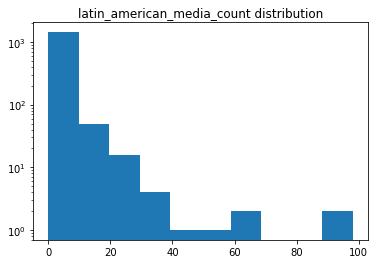

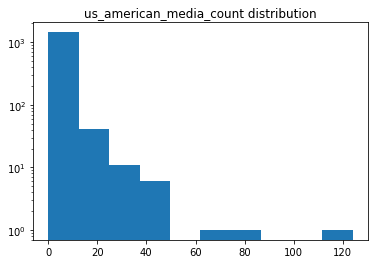

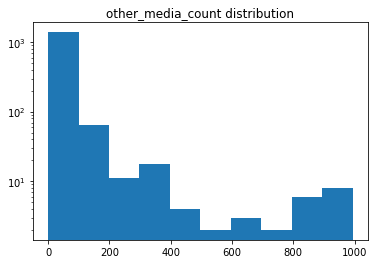

In [278]:
# plot distribution of all media types
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
all_media_vars = ['latin_american_media_count', 'us_american_media_count', 'other_media_count']
for media_var in all_media_vars:
    plt.hist(loanword_author_media_data.loc[:, media_var])
    plt.title(f'{media_var} distribution')
    plt.yscale('log')
    plt.show()

Most people share just a few media links, and most links are not US American artists or Latin American artists.

For simplicity, let's assign an author to "high-media" status if they share more than the median of a particular media category.

In [280]:
import numpy as np
media_categories = ['latin_american_media_count', 'us_american_media_count', 'other_media_count', 'media_count']
for media_category in media_categories:
    media_vals = loanword_author_media_data.loc[:, media_category]
    valid_media_vals = media_vals[media_vals > 0]
    media_val_cutoff = np.median(valid_media_vals)
    print(media_val_cutoff)
    loanword_author_media_data = loanword_author_media_data.assign(**{
        f'{media_category}_bin' : (loanword_author_media_data.loc[:, media_category] > media_val_cutoff).astype(int)
    })

2.0
2.0
16.0
18.0


### Test differences in per-word integration
What are some examples of native verbs that have high integration among high-media authors and low integration among low-media authors?

In [181]:
import pandas as pd
native_verb_post_data = pd.read_csv('../../data/mined_tweets/native_verbs_post_social_data.tsv', sep='\t')
print(native_verb_post_data.shape[0])

328651


In [187]:
# compute integrated rate per-word, per author group
author_var = 'screen_name'
media_var = 'balanced_latin_american_media_pct_bin'
native_word_var = 'native_word_type'
light_verb_var = 'has_light_verb'
media_group_integration_pct = native_verb_post_data.groupby([media_var, native_word_var]).apply(lambda x: 1-x.loc[:, light_verb_var].mean()).reset_index().rename(columns={0 : 'integration_pct'})

In [188]:
display(media_group_integration_pct.head())

,balanced_latin_american_media_pct_bin,native_word_type,integration_pct
0,media_high,admirar,1.000000
1,media_high,amistar,0.000000
2,media_high,animar,0.928571
3,media_high,anotar,0.750000
4,media_high,aterrizar,1.000000


In [260]:
# compute differences
flat_media_group_integration_pct = pd.pivot(media_group_integration_pct, index='native_word_type', columns='balanced_latin_american_media_pct_bin', values=['integration_pct']).reset_index()
# fix columns
flat_media_group_integration_pct.columns = list(map(lambda x: '*'.join(filter(lambda y: y!='', x)), zip(flat_media_group_integration_pct.columns.get_level_values(0), flat_media_group_integration_pct.columns.get_level_values(1))))
# compute differences
flat_media_group_integration_pct = flat_media_group_integration_pct.assign(**{
    'high_low_media_integration_diff' : flat_media_group_integration_pct.loc[:, 'integration_pct*media_high'] - flat_media_group_integration_pct.loc[:, 'integration_pct*media_low']
})
flat_media_group_integration_pct = flat_media_group_integration_pct.dropna(axis=0, how='all', subset=['high_low_media_integration_diff'])
flat_media_group_integration_pct.sort_values('high_low_media_integration_diff', inplace=True, ascending=False)
display(flat_media_group_integration_pct.head(10))
display(flat_media_group_integration_pct.tail(10))

,native_word_type,integration_pct*media_high,integration_pct*media_low,integration_pct*media_mid,high_low_media_integration_diff
5,bromear,0.857143,0.379310,0.000000,0.477833
27,originar,0.714286,0.500000,NaN,0.214286
18,estimar,1.000000,0.875000,NaN,0.125000
37,remediar,0.857143,0.750000,0.666667,0.107143
12,dañar,0.408922,0.322981,0.325000,0.085941
3,anotar,0.750000,0.666667,0.700000,0.083333
16,dudar,0.897436,0.820513,0.733333,0.076923
14,disculpar,0.417722,0.344828,0.470588,0.072894
20,finalizar,0.809524,0.736842,0.833333,0.072682
31,preciar,0.571429,0.500000,0.333333,0.071429


,native_word_type,integration_pct*media_high,integration_pct*media_low,integration_pct*media_mid,high_low_media_integration_diff
11,culpar,0.728972,0.739130,0.692308,-0.010158
13,decidir,0.920886,0.931579,0.974359,-0.010693
30,pisar,0.972477,0.991379,1.000000,-0.018902
25,multar,0.904762,0.931034,1.000000,-0.026273
21,fotografiar,0.158730,0.187500,0.266667,-0.028770
2,animar,0.928571,0.975207,0.866667,-0.046635
15,duchar,0.888889,0.954545,1.000000,-0.065657
45,vistar,0.107692,0.280000,0.333333,-0.172308
22,fugar,0.500000,0.800000,0.000000,-0.300000
40,sestear,0.000000,0.333333,0.000000,-0.333333


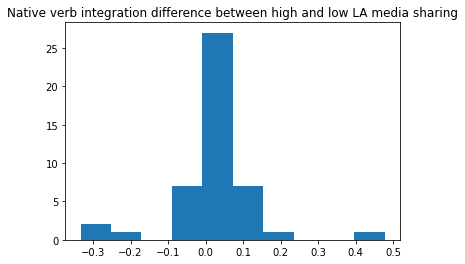

mean diff = 0.013 (test stat = 0.772, p=4.443E-01)


In [264]:
# plot overall difference distribution
# we expect to see overall positive trend, i.e. high-media authors integrate verbs more often
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(flat_media_group_integration_pct.loc[:, 'high_low_media_integration_diff'])
plt.title('Native verb integration difference between high and low LA media sharing')
plt.show()
# is it greater than 0?
from scipy.stats import ttest_1samp
mean_diff = flat_media_group_integration_pct.loc[:, 'high_low_media_integration_diff'].dropna().mean()
test_stat, p_val = ttest_1samp(flat_media_group_integration_pct.loc[:, 'high_low_media_integration_diff'], 0.)
print('mean diff = %.3f (test stat = %.3f, p=%.3E)'%(mean_diff, test_stat, p_val))

OK! Can we say that the verbs with the biggest integration difference are more related to Spanish-speaking culture? Or at least older in general?

- (high-media) `bromear`, `originar`, `estimar`, `dañar`, `dudar` seem to be more entrenched in lexicon
- (low-media) `fotografiar`, `vistar`, `duchar` seem less entrenched

Maybe we should compare these differences with frequency, i.e. assuming that more frequent words are generally more entrenched and therefore more likely to be integrated by "conservative" authors.

In [277]:
# let's get frequency from Google Ngrams
import sys
if('google-ngrams' not in sys.path):
    sys.path.append('google-ngrams')
from importlib import reload
import getngrams
reload(getngrams)
from getngrams import getNgrams
import requests
native_words = flat_media_group_integration_pct.loc[:, 'native_word_type'].unique()
corpus = 'spa_2009'
corpus_idx_lookup = {'spa_2009' : 10}
corpus_idx = corpus_idx_lookup[corpus]
start_year = 1950
end_year = 2008
smoothing = 3
case_insensitive = False
time_var = 'year'
combined_results = []
for native_word in native_words:
    query = f'{native_word}_INF'
    # request_str = f'https://books.google.com/ngrams/graph?corpus={corpus_idx}&case_insensitive=True&year_start={start_year}&content={query}&year_end={end_year}&smoothing={smoothing}'
    # request_result = requests.get(request_str)
    # print(request_result)
    req_url, req_content, query_results = getNgrams(query, corpus, start_year, end_year, smoothing, case_insensitive)
    # if only one word type in results, then change query (e.g. "preciar_INF" -> "preciar")
    if(query_results.shape[1] == 2):
        query = native_word
    # only keep year and INF counts
    query_results = query_results.loc[:, [time_var, query]].rename(columns={query : 'norm_freq'}).assign(**{'word' : native_word})
    combined_results.append(query_results)
combined_results = pd.concat(combined_results, axis=0)
display(combined_results.head())
print(combined_results.shape[0])

,year,norm_freq,word
0,1950,9.976493e-07,bromear
1,1951,9.824412e-07,bromear
2,1952,9.645793e-07,bromear
3,1953,9.471969e-07,bromear
4,1954,9.661567e-07,bromear


2714


In [278]:
# compute mean frequency
word_var = 'word'
freq_var = 'norm_freq'
mean_word_freq = combined_results.groupby(word_var).apply(lambda x: x.loc[:, freq_var].mean()).sort_values(inplace=False, ascending=False).reset_index().rename(columns={word_var:'native_word_type', 0:freq_var})
display(mean_word_freq.head())

,native_word_type,norm_freq
0,usar,0.000314
1,mirar,0.000205
2,dudar,0.000191
3,probar,0.000175
4,preguntar,0.000169


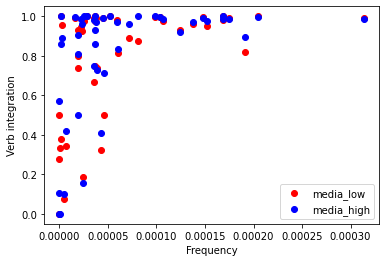

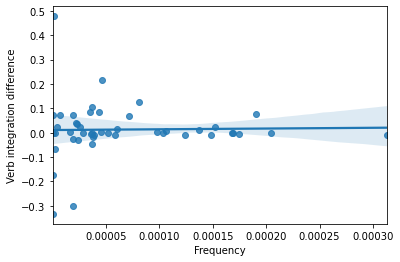

high-low integration difference = 0.013 (test stat = 321.000, p=1.559E-01)
frequency/integration difference correlation = 0.062 (p=6.828E-01)
media group integration_pct*media_low has correl=0.502 (p=3.747E-04)
media group integration_pct*media_high has correl=0.475 (p=8.567E-04)


In [288]:
# plot frequency vs. integration difference
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, wilcoxon
native_word_var = 'native_word_type'
integration_diff_var = 'high_low_media_integration_diff'
# plot high/low in parallel
word_freq_integration_stats = pd.merge(mean_word_freq, flat_media_group_integration_pct, on=native_word_var)
freq_var = 'norm_freq'
low_media_integration_var = 'integration_pct*media_low'
high_media_integration_var = 'integration_pct*media_high'
plt.scatter(word_freq_integration_stats.loc[:, freq_var], word_freq_integration_stats.loc[:, low_media_integration_var], color='r', label='media_low')
plt.scatter(word_freq_integration_stats.loc[:, freq_var], word_freq_integration_stats.loc[:, high_media_integration_var], color='b', label='media_high')
plt.legend(loc='lower right')
plt.xlabel('Frequency')
plt.ylabel('Verb integration')
plt.show()
# plot differences
sns.regplot(word_freq_integration_stats.loc[:, freq_var], word_freq_integration_stats.loc[:, integration_diff_var])
plt.xlabel('Frequency')
plt.ylabel('Verb integration difference')
plt.show()
## is integration higher with high-media authors?
mean_diff = (word_freq_integration_stats.loc[:, high_media_integration_var] - word_freq_integration_stats.loc[:, low_media_integration_var]).mean()
test_stat, p_val = wilcoxon(word_freq_integration_stats.loc[:, high_media_integration_var], word_freq_integration_stats.loc[:, low_media_integration_var])
print('high-low integration difference = %.3f (test stat = %.3f, p=%.3E)'%(mean_diff, test_stat, p_val))
correl, p_val = spearmanr(word_freq_integration_stats.loc[:, freq_var], word_freq_integration_stats.loc[:, integration_diff_var])
print('frequency/integration difference correlation = %.3f (p=%.3E)'%(correl, p_val))
# test frequency correlation with each var
media_integration_vars = [low_media_integration_var, high_media_integration_var]
for media_integration_var in media_integration_vars:
    correl, p_val = spearmanr(word_freq_integration_stats.loc[:, freq_var], word_freq_integration_stats.loc[:, media_integration_var])
    print('media group %s has correl=%.3f (p=%.3E)'%(media_integration_var, correl, p_val))

OK! There is a weak but insignificant correlation, i.e. more frequent words are slightly more likely to see more integration among high-media authors as opposed to low-media authors.

For both high-media and low-media authors, frequency has significant positive correlation with overall integration rate.

Do high-media authors tend to use high-frequency words more often than low-media authors? This could be what's driving the trend.

### Compare high-media vs. low-media authors with different native verb integration: matching
Let's match each high-media author with a similar low-media author (Spanish use, location) and look for paired examples with different types of integration.

In [296]:
import pandas as pd
native_verb_post_data = pd.read_csv('../../data/mined_tweets/native_verbs_post_social_data.tsv', sep='\t')
control_vars = ['description_location_region', 'es_bin']
treat_var = 'balanced_latin_american_media_pct_bin'
txt_var = 'text'
native_verb_post_data = native_verb_post_data.drop_duplicates(txt_var, inplace=False)
paired_author_data = []
for (loc_i, lang_i), control_data_i in native_verb_post_data.groupby(['description_location_region', 'es_bin']):
    high_media_data_i = control_data_i[control_data_i.loc[:, treat_var]=='media_high']
    low_media_data_i = control_data_i[control_data_i.loc[:, treat_var]=='media_low']
    if(high_media_data_i.shape[0] > 0 and low_media_data_i.shape[0] > 0):
        media_data_i = pd.concat([high_media_data_i, low_media_data_i], axis=0)
        paired_author_data.append(media_data_i)
paired_author_data = pd.concat(paired_author_data, axis=0)

In [298]:
import numpy as np
np.random.seed(123)
word_var = 'native_word_type'
txt_var = 'text'
light_verb_var = 'has_light_verb'
text_sample_size = 5
for (loc_i, lang_i), control_data_i in paired_author_data.groupby(['description_location_region', 'es_bin']):
    print('loc=%s, lang=%s'%(loc_i, lang_i))
    np.random.shuffle(control_data_i.values)
    for word_j, control_data_j in control_data_i.groupby(word_var):
        print(f'testing word={word_j}')
        high_media_data_j = control_data_j[control_data_j.loc[:, treat_var]=='media_high']
        low_media_data_j = control_data_j[control_data_j.loc[:, treat_var]=='media_low']
        # restrict to integrated/light verb
        high_media_data_j = high_media_data_j[high_media_data_j.loc[:, light_verb_var]==0]
        low_media_data_j = low_media_data_j[low_media_data_j.loc[:, light_verb_var]==1]
        # show example text
        if(high_media_data_j.shape[0] > 0 and low_media_data_j.shape[0] > 0):
            print('high-media examples')
            print('\n'.join(high_media_data_j.loc[:, txt_var].values[:text_sample_size]))
            print('low-media examples')
            print('\n'.join(low_media_data_j.loc[:, txt_var].values[:text_sample_size]))

loc=UNK, lang=es_mid
testing word=admirar
testing word=animar
high-media examples
Ahora que no tengo gato curioso, ¿por qué no se animan a pololearme por el dm?
Ésta tarde se inaugura la calle peatonal de Corrientes, no se cómo se animaron a cerrar una calle enorme en el centro mismo de Buenos Aires pero va ser hermoso, espectáculos aéreos, conciertos en balcones, 15.000 artistas por todos lados, que lindo kilombo va ser,estén atentos
Lo único que me animará será tener los boletos para ver a mis italianos
Ya se que me animará al cien ver el concierto de mi pecas
Que nunca nos falte el reggaeton viejito para animar las fiestas
low-media examples
Me caga que la gente me quiera subir el ánimo, pero, no me molesta nada que Pichi lo haga. Además, cómo no apreciar que se quede hasta éstas horas sólo para hablar conmigo.
Las historias de Natalia me acaban de subir el ánimo muchísimo la quiero tela
testing word=anotar
high-media examples
No te olvides de anotar este día en tu agenda https://ww

high-media examples
Hoy soñé que conocía a CNCO y que encima estaba en primera fila en el concierto, luego me desperté
Se imaginan que la otra canción sea una balada nueva de Martina con yatra?? Que bonito soñar y que gratis
Me muero de sueño pero de aquí no me voy hasta que lo vea TINI LA CRISTINA DE YATRA
@gmatrick Déjame soñar quieres Geo?
Convierte tus horas de sueño en entrenaniento SABEB QUE MAMADOS VAN A ESTAR MIS POKES OMG!!!!!pic.twitter.com/gUjz295unJ
low-media examples
Tuve un sueño que dio mio, me gustaria que pasara
Detesto cuando pasa esto tener un sueño y sentir que fue cierto aún cuando ya estás despierto...
Detesto cuando pasa esto, tener un sueño y sentir que fue cierto aún cuando ya estoy despierto...
Detesto cuando pasa esto, tener un sueño y sentir que fue cierto aún cuando ya estás despierto...
Anoche tuve un sueño muy intenso y ya no se qué pensar de mi subconsciente.
testing word=terminar
testing word=usar
high-media examples
Podrías usar ese último argumento pa

testing word=viajar
high-media examples
Que no todo sea criticar. Y que no nos cueste tanto agradecer el buen trabajo de las instituciones. Viajar otorga perspectiva sobre esto.
Genial,como siempre.Nos haces reflexionar sobre qué es el prestigio,nos haces sentir con un relato que toca el corazón y nos haces viajar al futuro que nos espera si esto no cambia
Si esta ha de ser la última oportunidad, viajaré contigo a la ciudad del frío más allá del infinito que nos abraza.
low-media examples
Tengo unas ganas de hacer un viaje largo en coche escuchando música y quedándome dormida uff
Cada vez que hacemos un viaje me tiene que recordar todo lo que hemos visto, es la mejor guía turística del universo https://twitter.com/A60221023/status/960449799064604672 …
testing word=vistar
testing word=volar
loc=latin_america, lang=es_high
testing word=admirar
testing word=animar
testing word=aterrizar
testing word=castigar
testing word=comprar
testing word=culpar
testing word=dañar
testing word=decidir


testing word=mirar
testing word=multar
testing word=negociar
high-media examples
Vamos a ver si lees un poco sobre cómo negociar bien antes de decir semejante caGADA.
Dejará el cargo si se aprueba el acuerdo que ella negoció con la UE y que ya ha sido rechazado dos veces por el parlamento? https:// twitter.com/AFPespanol/sta tus/1110970773953544193 …
Algún político que no lo haga? Esa es la política, mostrar ser visto, exponer, negociar, proponer
Esa derecha olvida que tenemos un parlamento que obstruye toda iniciativa del gobierno, que dice a todo no y que ha obligado q negociar hasta lo más ridículo. Próximo Gob pasa por tener un mejor congreso para poder progresar:
ya saben: si tienen que negociar la renovación del alquiler llamen al descarado cancherito de @lucasllach que les saca un 10 +/- 2 de ajuste.
low-media examples
Lo importante es cuántos fueron a hacer negocios.
Harry potter y la piedra tan hp que me da cuando hago negocios con mis amigos y no pagan
Compradores de 45 paíse

testing word=mencionar
testing word=mirar
testing word=negociar
testing word=participar
testing word=pasear
testing word=pisar
testing word=preguntar
testing word=probar
high-media examples
Hoy me llamó y me dijo que pasé la prueba de fuego y aquí se acaba el recuento de mi noche.pic.twitter.com/hIWSLGkzhe
Estaba usando aceite de coco para desmaquillarme por varias razones, primero por "natural", quita TODO y es súper barato pero decidí probar un desmaquillante high end y neta wow, lo que más impacto es como facilita la aplicación de mis demás productos de Skin Care.
No me quiero morir sin antes probar estohttps://twitter.com/cuantaindirecta/status/1120714253785341953 …
Tendríamos que ir a probar en vivo y directo
Te gustan los mariscos? — Nunca probé https:// curiouscat.me/Chulyacosta11/ post/881889842?t=1558499908 …
low-media examples
La vida es muy hija de puta y me pone a prueba cada vez que el que va sentado al lado mio -contra la ventanilla- me pide bajarse durante una curva.... 

Examples:

- location = `Latin America`, lang = `high Spanish`
    - verb = `viajar`
        - `High-media`: "Este Viernes sabremos como estudiar y viajar en Australia, nos visitaran los amigos de @ openstudyau conozca todo lo que necesita saber, los esperamos viernes 14 de diciembre después de las 4"
        - `Low-media`: "che no me hago un viaje de casi 2 horas para ir a un teórico para que -se colen -empujen -pelotudos hagan ruido con las llaves generando ilusión de que abren el aula - Y LE GUARDEN LUGAR A SUS AMIGUES QUE LLEGAN TARDE AL TEÓRICO"
- location = `Latin America`, lang = `mid Spanish`
    - verb = `animar`
        - `High-media`: "Ayer hicimos la previa con la #TrasnochadaCeleste en @noched10 por @espectador810 y hubo desde rueda de penca hasta tarot. Me animé a vaticinar 1-0 Uruguay... ¡Me quedé chiquita! Uruguay nomaaaa"
        - `Low-media`: "gracias, me subiste el ánimo jaja"
    - verb = `tomar`
        - `High-media`: "Hablemos del concepto del concepto de MOLESTAR la proxima que nos veamos. Lo voy a anotar"
        - `Low-media`: "No creo que sea una solución factible para mí, pero tomo nota"
- location = `Europe`, lang = `mid Spanish`
    - verb = `decidir`
        - `High-media`: "La Universidad es, al final, lo que tú quieras que sea. Tú decides si te quedas con lo que aprendes en clase o apuestas por ir mucho más allá. Si idealizar es creer que la Universidad tiene una parte de "UNIVERSAL", como su nombre indica y todo lo que eso conlleva, soy idealista."
        - `Low-media`: "Se deben tomar decisiones basadas en la mejor evidencia disponible (conocimiento de la patología), adaptadas a la situación clínica (formación clínica) y centradas en la persona (preferencias, pronóstico...) ...no en listas de medicamentos"
    - verb = `mencionar`
        - `High-media`: "Perdón, se me ha olvidado mencionar que no sea Nintendo. Está claro que si tienes niños necesitas una Nintendo en casa"
        - `Low-media`: "No hicieron mención al día de la mujer el 8M. Se me hinchan las venas del cuello por momentos."
- location = `USA`, lang = `mid Spanish`
    - verb = `pasear`
        - `High-media`: "Esa “representacion” del mito de “las grandes jornadas internacionales” eran partidos de fogueo de equipos europeos que venian a pasear en pretemporada = putas y guaro. Heredia los agarraba de ultimo con 4-5 jugadores de LDA y Saprissa"
        - `Low-media`: "Morena ve y da un paseo por Instagram, deja de traer a tus amiguis a la tl 😂"
    - verb = `preguntar`
        - `High-media`: "quiero decir trabajo con masa todos los dias si alguien no ve el precio de un producto, pasa de llevarselo porque pasa de esforzarse en preguntar"
        - `Low-media`: "entra a WhatsApp, caraja. Te hice una pregunta."

The messages from low-media authors seem more personal, less complicated, more spontaneous (?).

### Compare high-media vs. low-media authors with different loanword verb integration: matching
Let's do the same thing but with loanword verbs.

In [303]:
import pandas as pd 
loanword_verb_post_data = pd.read_csv('../../data/mined_tweets/loanword_verbs_post_social_data.tsv', sep='\t')
control_vars = ['description_location_region', 'es_bin']
treat_var = 'balanced_latin_american_media_pct_bin'
txt_var = 'text'
native_verb_post_data = loanword_verb_post_data.drop_duplicates(txt_var, inplace=False)
paired_author_data = []
for (loc_i, lang_i), control_data_i in loanword_verb_post_data.groupby(['description_location_region', 'es_bin']):
    high_media_data_i = control_data_i[control_data_i.loc[:, treat_var]=='media_high']
    low_media_data_i = control_data_i[control_data_i.loc[:, treat_var]=='media_low']
    if(high_media_data_i.shape[0] > 0 and low_media_data_i.shape[0] > 0):
        media_data_i = pd.concat([high_media_data_i, low_media_data_i], axis=0)
        paired_author_data.append(media_data_i)
paired_author_data = pd.concat(paired_author_data, axis=0)
print(paired_author_data.shape[0])

1195


In [304]:
import numpy as np
np.random.seed(123)
word_var = 'loanword'
txt_var = 'text'
light_verb_var = 'has_light_verb'
text_sample_size = 5
for (loc_i, lang_i), control_data_i in paired_author_data.groupby(['description_location_region', 'es_bin']):
    print('loc=%s, lang=%s'%(loc_i, lang_i))
    np.random.shuffle(control_data_i.values)
    for word_j, control_data_j in control_data_i.groupby(word_var):
        print(f'testing word={word_j}')
        high_media_data_j = control_data_j[control_data_j.loc[:, treat_var]=='media_high']
        low_media_data_j = control_data_j[control_data_j.loc[:, treat_var]=='media_low']
        # restrict to integrated/light verb
        high_media_data_j = high_media_data_j[high_media_data_j.loc[:, light_verb_var]==0]
        low_media_data_j = low_media_data_j[low_media_data_j.loc[:, light_verb_var]==1]
        # show example text
        if(high_media_data_j.shape[0] > 0 and low_media_data_j.shape[0] > 0):
            print('high-media examples')
            print('\n'.join(high_media_data_j.loc[:, txt_var].values[:text_sample_size]))
            print('low-media examples')
            print('\n'.join(low_media_data_j.loc[:, txt_var].values[:text_sample_size]))

loc=UNK, lang=es_mid
testing word=DM
testing word=access
high-media examples
En el espacio del poder, la creación y la relación. Tu puedes accesar a maneras de ser que te… https://t.co/hBvgwgmb4K
@Franche007 añadele link de Spotify o YouTube pa accesar la canciones de manera más fácil
@Keylaimatos @QuilleAzul Bloquear las IP que accesan a esos servidores de dónde se conecta la app de BlueMax. Así es que compiten aquí.
@Keylaimatos @QuilleAzul Bloquear las IP que accesan a esos servidores de dónde se conecta la app de BlueMax. Así es que compiten aquí.
En un país,  en el que un ciudadano simple es inhabilitado a los 50 años para accesar a trabajo, financiamientos, e… https://t.co/Jr23wKXg0J
low-media examples
@_____nana_ En popcorn time está en buena calidad... yo la veo cada vez que tengo acceso al catálogo de Netflix usa, ahorita busco un link 😉
testing word=audit
testing word=ban
testing word=block
testing word=box
high-media examples
@fabbiolanavarro ¡Ya vámonos a boxear el lunes, v

high-media examples
@Multixidols Se supone que si, pero aun hay fan votando por sus ídolos y hasta nick tweetea con los #… https://t.co/27FoN0tYFG
@Buscandoanoe Entonces como tweeteas ? 🤔🤔 Eres inmortal ?
low-media examples
RT @cmonspaingirl: cuando envías un tweet con una palabra mal escrita y la gente empieza a darle RT https://t.co/E4URkU0qvd
@theroyal_parade @IrvingTabares @KarlaBArmstrong Alv, a mi me envió un tweet pero lo borro diciendo "SÍGUEME QUE YO TE SIGO BLAH BLAH BLAH"
@jamesmaslow entendí que te fue excelente,maravilloso en mx pero tira un tweet que al menos nos querés si no vas a venir frentudo del orto a
RT @Pano_Joney: Ya tengo los 280. Iba a poner un tweet de esos largos diciendo cosas pero mejor pongo a muchas veces: aaaaaaaaaaaaa… 
Era reba pero bueno les pondré un tweet❤️
testing word=twerk
testing word=vape
testing word=zap
loc=europe, lang=es_high
testing word=rank
testing word=tweet
loc=europe, lang=es_mid
testing word=DM
testing word=ban
testing word=boycott
t

high-media examples
@Jhobanessa Y no me zapeaste pues! 😒
low-media examples
Con el permiso de @soyfdelrincon haré zapping...
loc=other, lang=es_mid
testing word=ban
testing word=block
testing word=cast
testing word=flash
testing word=flip
testing word=like
testing word=post
testing word=push
testing word=rape
testing word=reset
testing word=rock
testing word=surf
testing word=tweet
loc=us_america, lang=es_mid
testing word=boycott
testing word=bully
testing word=chat
testing word=connect
testing word=drain
testing word=film
testing word=flash
testing word=flip
testing word=google
testing word=hang
testing word=like
high-media examples
Tengo un crush con una española que me likea cosas en mi cuenta alterna, ¿ahí qué?
low-media examples
Y tómala que le doy un like...
testing word=link
testing word=pitch
testing word=post
testing word=push
testing word=quote
testing word=render
testing word=selfie
testing word=ship
high-media examples
Cómo dejar de shippear Ruggarol...yahoo respuestas lpm 

Examples:

- location = `Latin America`, lang = `mid Spanish`
    - verb = `access`
        - `High-media`: "@eticket @Club_Queretaro una pregunta, con este boleto podré accesar a los dos partidos o tengo que ir a taquillas"
        - `Low-media`: "La chiquita desnutrida de 13 años que fue sometida ayer en Chaco a una cesárea de urgencia murió esta tarde. No tuve acces"
    - verb = `google`
        - `High-media`: "@camiberlaskyy ni idea cuándo empezó pero me imagino que si lo googleas te salta"
        - `Low-media`: "Cómo me enferma que se tomen todo a pecho NO SABES QUE ES EL SARCASMO BUENO BUSCA EN GOOGLE Y DEJATE DE JODER gracias"
    - verb = `like`
        - `High-media`: "El juego de likear comentarios de Instagram a famosos por @guaschetti y @dadatina es paco."
        - `Low-media`: "si te doy like en todo básicamente es porque te quiero hablar porque te quiero ahre que intensa"
- location = `US America`, lang = `mid Spanish`
    - verb = `like`
        - `High-media`: "Tengo un crush con una española que me likea cosas en mi cuenta alterna, ¿ahí qué?"
        - `Low-media`: "Y tómala que le doy un like..."
    - verb = `ship`
        - `High-media`: "Cómo dejar de shippear Ruggarol...yahoo respuestas lpm — No te puedo ayudar te prometo que yo los seguiré shippean"
        - `Low-media`: "@LMHyuk_ Pero yo tengo ship de amigos :(  Tessaïa con Tessa (?"

### stupid plots
Regression effects with error bars

,Estimate,Variable,Word type
0,1.871666,High Spanish,Loanword
1,2.098711,High Spanish,Loanword
2,2.020845,High Spanish,Loanword
3,1.825814,High Spanish,Loanword
4,1.926933,High Spanish,Loanword


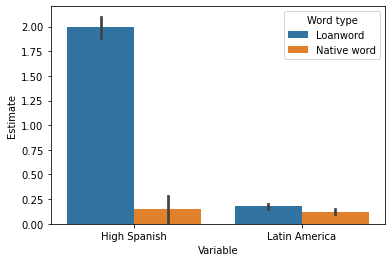

In [329]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
np.random.seed(123)
plot_data = [
    [0.177, 0.026, 'Latin America', 'Loanword'],
    [0.124, 0.025, 'Latin America', 'Native word'],
    [1.99, 0.109, 'High Spanish', 'Loanword'],
    [0.144, 0.134, 'High Spanish', 'Native word'],
]
plot_data = pd.DataFrame(plot_data, columns=['Estimate', 'SE', 'Variable', 'Word type'])
# generate data to plot error bars UGH
def generate_synthetic_data(data):
    synthetic_plot_data = []
    N = 10000
    for (var_i, word_type_i), data_i in data.groupby(['Variable', 'Word type']):
        beta_i = data_i.loc[:, 'Estimate'].iloc[0]
        SE_i = data_i.loc[:, 'SE'].iloc[0]
        sample_i = pd.DataFrame(np.random.normal(loc=beta_i, scale=SE_i, size=N), columns=['Estimate'])
        sample_i = sample_i.assign(**{
            'Variable' : var_i,
            'Word type' : word_type_i
        })
        synthetic_plot_data.append(sample_i)
    synthetic_plot_data = pd.concat(synthetic_plot_data, axis=0)
    return synthetic_plot_data
synthetic_plot_data = generate_synthetic_data(plot_data)
display(synthetic_plot_data.head())
sns.barplot(x='Variable', y='Estimate', hue='Word type', ci='sd', data=synthetic_plot_data)
plt.show()

,Estimate,Variable,Word type
0,0.047327,High SLA media,Loanword
1,0.190190,High SLA media,Loanword
2,0.150349,High SLA media,Loanword
3,0.080960,High SLA media,Loanword
4,-0.177983,High SLA media,Loanword


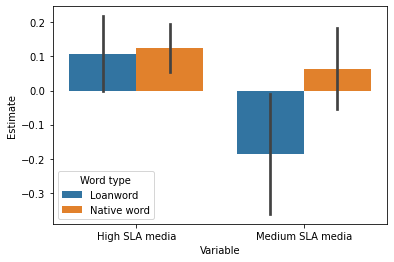

In [328]:
plot_data = [
    [0.108, 0.109, 'High SLA media', 'Loanword'],
    [0.126, 0.070, 'High SLA media', 'Native word'],
    [-0.184, 0.176, 'Medium SLA media', 'Loanword'],
    [0.063, 0.120, 'Medium SLA media', 'Native word'],
]
plot_data = pd.DataFrame(plot_data, columns=['Estimate', 'SE', 'Variable', 'Word type'])
synthetic_plot_data = generate_synthetic_data(plot_data)
display(synthetic_plot_data.head())
sns.barplot(x='Variable', y='Estimate', hue='Word type', ci='sd', data=synthetic_plot_data)
plt.show()